# Lending Club Case Study

In [1]:
'''
import nescessary modules
'''
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

In [2]:
# Read the loan.csv file into a pandas dataframe
df = pd.read_csv('loan.csv')

In [3]:
# Display all columns in a dataframe without truncating output
pd.set_option('display.max_columns',None)

# Data Cleaning

In [4]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
df.tail(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.0,0.0,2822.969293,1213.88,2500.0,322.97,0.0,0.0,0.0,Jul-10,80.90,NaN,Jun-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.0,0.0,9913.491822,1020.51,8500.0,1413.49,0.0,0.0,0.0,Jul-10,281.94,NaN,Jul-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,0.0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.0,0.0,17,0,85607,0.70%,26,f,0.0,0.0,5174.198551,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [6]:
# Check shape of the dataframe
df.shape

(39717, 111)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [8]:
# Check null values present in each feature
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [9]:
# drop null features
df = df.dropna(how='all',axis=1)

In [10]:
# shape of dataframe after dropping null values
df.shape

(39717, 57)

In [11]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [12]:
df.isnull().sum() / df.shape[0]

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     0.061913
emp_length                    0.027066
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
desc                          0.325805
purpose                       0.000000
title                         0.000277
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs              

In [13]:
# filter features where the null value rate is greater than 50%
columns = (df.isnull().sum() / df.shape[0] )[df.isnull().sum() / df.shape[0] > .50].index

In [14]:
columns

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'], dtype='object')

In [15]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [16]:
# Has too many categories to analysis
df['title'].nunique()

19615

In [17]:
# Has sufficient no.of categories
df['purpose'].nunique()

14

* These columns were dropped because these seemed irrelavant to the analysis

In [18]:
#dropping irrelavant columns
df = df.drop(columns = ['id','member_id','earliest_cr_line','url','desc','title','zip_code','collection_recovery_fee','policy_code'])

In [19]:

df['mths_since_last_delinq'].describe()

count    14035.000000
mean        35.900962
std         22.020060
min          0.000000
25%         18.000000
50%         34.000000
75%         52.000000
max        120.000000
Name: mths_since_last_delinq, dtype: float64

In [20]:
df['mths_since_last_delinq'].value_counts(bins=4)

(-0.121, 30.0]    6295
(30.0, 60.0]      5371
(60.0, 90.0]      2360
(90.0, 120.0]        9
Name: mths_since_last_delinq, dtype: int64

In [21]:
df[df['mths_since_last_delinq'].isna()].head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,AZ,27.65,0,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,Jan-15,171.62,NaN,May-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,GA,1.00,0,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,Apr-13,119.66,NaN,Sep-13,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,IL,8.72,0,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,Jun-14,649.91,NaN,May-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,wedding,AZ,11.20,0,3,NaN,NaN,9,0,7963,28.30%,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.0,0.00,Jan-15,161.03,NaN,Jan-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
6,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,n,debt_consolidation,NC,23.51,0,1,NaN,NaN,7,0,17726,85.60%,11,f,0.0,0.0,10110.840000,10110.84,6985.61,3125.23,0.0,0.00,May-16,1313.76,NaN,May-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0


In [22]:
df[df['mths_since_last_record'].isna()]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,AZ,27.65,0,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,GA,1.00,0,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,Apr-13,119.66,NaN,Sep-13,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,IL,8.72,0,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,CA,20.00,0,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,Jan-15,357.48,NaN,Apr-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,OR,17.94,0,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39659,4000,4000,1925.0,36 months,9.64%,128.41,B,B4,NaN,< 1 year,NONE,100000.0,Not Verified,Aug-07,Fully Paid,n,other,CA,15.00,0,1,NaN,NaN,6,0,8155,14.90%,8,f,0.00,0.00,4622.489229,2224.58,4000.00,622.49,0.00,0.00,Sep-10,129.76,NaN,Aug-07,NaN,INDIVIDUAL,0,NaN,0,NaN,NaN
39660,2800,2800,1625.0,36 months,8.70%,88.65,B,B1,NaN,< 1 year,NONE,120000.0,Not Verified,Aug-07,Fully Paid,n,other,MA,15.00,0,1,NaN,NaN,6,0,8155,14.90%,8,f,0.00,0.00,3191.218575,1852.05,2800.00,391.22,0.00,0.00,Sep-10,89.80,NaN,Aug-07,NaN,INDIVIDUAL,0,NaN,0,NaN,NaN
39686,6400,6400,4075.0,36 months,9.64%,205.45,B,B4,"Stratagem, Inc.",1 year,RENT,60000.0,Not Verified,Aug-07,Fully Paid,n,moving,WI,7.72,0,0,NaN,NaN,7,0,3362,69.30%,8,f,0.00,0.00,7395.962477,4709.15,6400.00,995.96,0.00,0.00,Aug-10,206.58,NaN,Jul-10,NaN,INDIVIDUAL,0,NaN,0,NaN,NaN
39688,20000,20000,2800.0,36 months,13.43%,678.08,E,E1,Auto motors of miami,6 years,MORTGAGE,145000.0,Not Verified,Aug-07,Charged Off,n,credit_card,FL,10.15,0,0,NaN,NaN,17,0,41674,74.10%,26,f,0.00,0.00,20339.660000,2845.82,16077.42,4262.24,0.00,0.00,Feb-10,678.08,NaN,May-16,NaN,INDIVIDUAL,0,NaN,0,NaN,NaN


In [23]:
df['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [24]:
# Most of the loans were fully paid 
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

<Axes: >

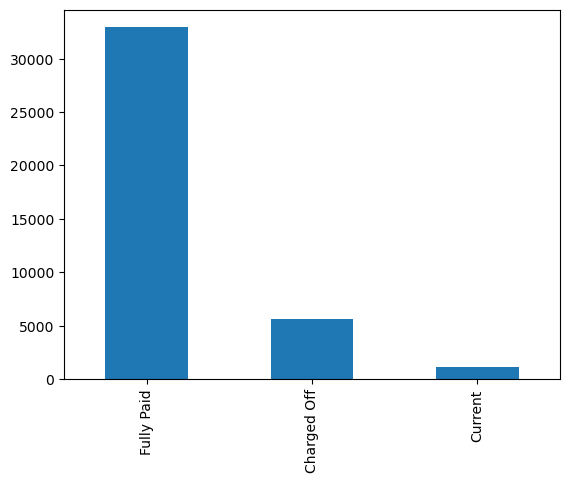

In [25]:
df['loan_status'].value_counts().plot(kind='bar')

In [26]:
# It seems the 36 month term is preferred
df['term'].value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [27]:
# strip any spaces uneeded spaces in the column term
df['term'] = df['term'].str.strip()

In [28]:
df[df['term'] == '36 months']['loan_status'].value_counts()  / df[df['term'] == '36 months']['loan_status'].value_counts().sum()

Fully Paid     0.889091
Charged Off    0.110909
Name: loan_status, dtype: float64

In [29]:
df[df['term'] == '60 months']['loan_status'].value_counts() / df[df['term'] == '60 months']['loan_status'].value_counts().sum()

Fully Paid     0.666698
Charged Off    0.225967
Current        0.107335
Name: loan_status, dtype: float64

In [30]:
for i in df.columns :
     if df[i].nunique() <=4 : 
            print(f'columns {i} {df[i].unique()}')

columns term ['36 months' '60 months']
columns verification_status ['Verified' 'Source Verified' 'Not Verified']
columns loan_status ['Fully Paid' 'Charged Off' 'Current']
columns pymnt_plan ['n']
columns initial_list_status ['f']
columns next_pymnt_d [nan 'Jun-16' 'Jul-16']
columns collections_12_mths_ex_med [ 0. nan]
columns application_type ['INDIVIDUAL']
columns acc_now_delinq [0]
columns chargeoff_within_12_mths [ 0. nan]
columns delinq_amnt [0]
columns pub_rec_bankruptcies [ 0.  1.  2. nan]
columns tax_liens [ 0. nan]


In [31]:
df.columns = df.columns.str.strip()

In [32]:
# Remove features with very few values
df = df.drop(columns = ['acc_now_delinq','delinq_amnt','application_type','pymnt_plan','tax_liens','initial_list_status','next_pymnt_d','collections_12_mths_ex_med','chargeoff_within_12_mths'])

In [33]:
df[df['pub_rec_bankruptcies'].isin([1,2])]['loan_status'].value_counts() / df[df['pub_rec_bankruptcies'].isin([1,2])]['loan_status'].value_counts().sum()

Fully Paid     0.757882
Charged Off    0.218917
Current        0.023200
Name: loan_status, dtype: float64

In [34]:
df[df['pub_rec_bankruptcies'].isin([0])]['loan_status'].value_counts() / df[df['pub_rec_bankruptcies'].isin([0])]['loan_status'].value_counts().sum()

Fully Paid     0.832829
Charged Off    0.137684
Current        0.029487
Name: loan_status, dtype: float64

In [35]:
# Extract only the month value from the 
df['term_duration_months'] = (df['term'].apply(lambda x : x.split(' ')[0])).astype('int')
df = df.drop(columns=['term'])

In [36]:
# Remove % and extract only numerical values from int_rate
df['int_rate'] = df['int_rate'].apply(lambda x : float(re.findall(r'\d+\.\d+',x)[0]) / 100 )

* Check of similar features
* As seen the set of features have an almost exact same distribution and are highly correlated
* Drop part of these features
* Business reason to drop this is amount by investors is a compoment of the amount . 


# Exploratory Data Analysis

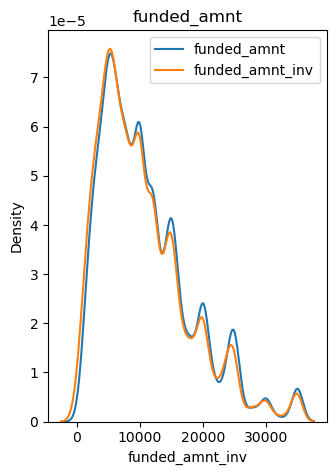

In [37]:
ax=plt.subplot(1, 2, 1)
for i in ['funded_amnt','funded_amnt_inv'] : 
    sns.distplot(df[i],ax=ax,hist=False,label=i)
plt.legend()
plt.tight_layout()
plt.title('funded_amnt')
plt.show()

<Axes: >

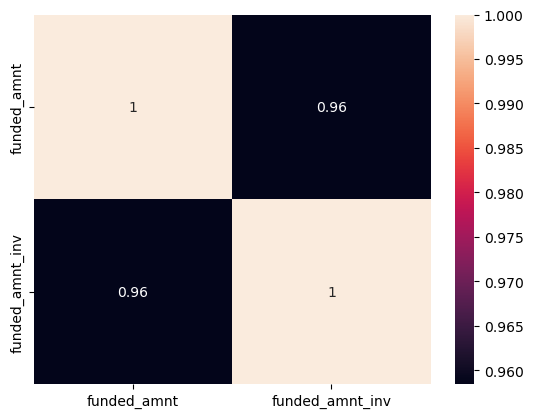

In [38]:
sns.heatmap(df[['funded_amnt','funded_amnt_inv']].corr(),annot=True)

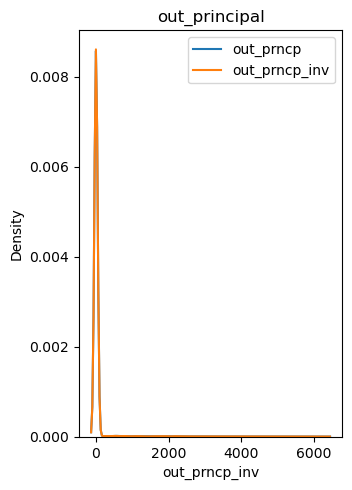

In [39]:

ax=plt.subplot(1, 2, 1)

for i in ['out_prncp', 'out_prncp_inv'] : 
    sns.distplot(df[i],hist=False,ax=ax,label=i)
plt.legend()
plt.tight_layout()
plt.title('out_principal')
plt.show()

<Axes: >

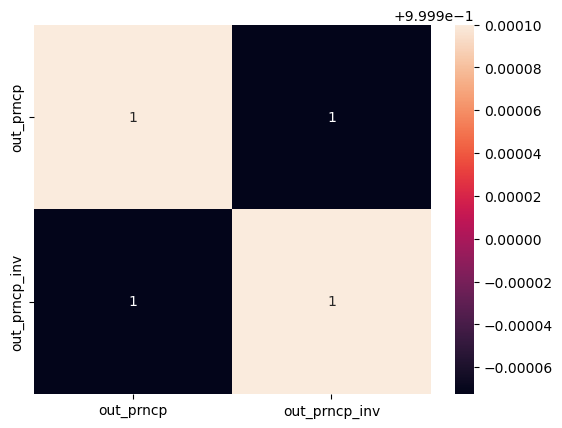

In [40]:
sns.heatmap(df[['out_prncp', 'out_prncp_inv']].corr(),annot=True)

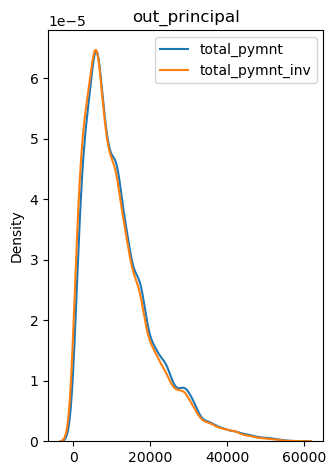

In [41]:

ax=plt.subplot(1, 2, 1)

for i in ['total_pymnt','total_pymnt_inv'] : 
    sns.distplot(x=df[i],ax=ax,hist=False,label=i)
plt.legend()
plt.tight_layout()
plt.title('out_principal')
plt.show()

<Axes: >

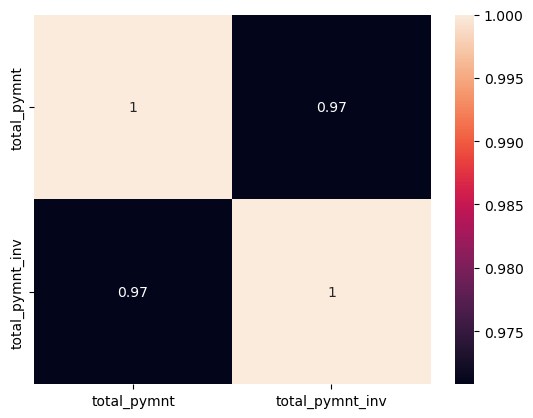

In [42]:
sns.heatmap(df[['total_pymnt','total_pymnt_inv']].corr(),annot=True)

In [43]:
inv_columns  = df.columns[df.columns.str.contains(r'_inv$')]

In [44]:
df = df.drop(columns=inv_columns)

# Univariate Analysis

In [45]:
# Filter out borrowers with loan status as current
df = df[df['loan_status'] != 'Current']

In [46]:
for i in df.columns : 
    if df[i].nunique() <=4 : 
        print(f'column {i} has values {df[i].unique()}')

column verification_status has values ['Verified' 'Source Verified' 'Not Verified']
column loan_status has values ['Fully Paid' 'Charged Off']
column out_prncp has values [0.]
column pub_rec_bankruptcies has values [ 0.  1.  2. nan]
column term_duration_months has values [36 60]


In [47]:
df = df.drop(columns = ['out_prncp'])

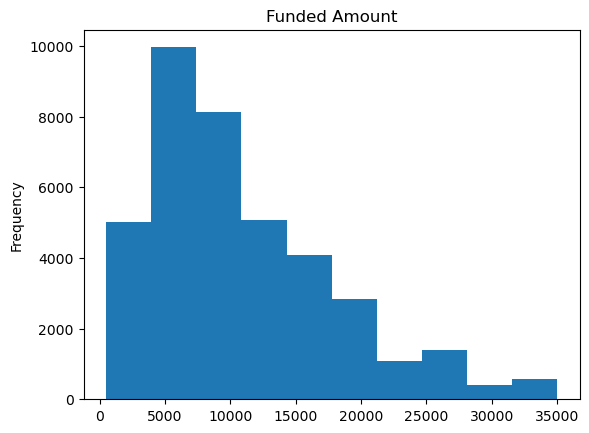

In [48]:
# Distribution of funded_amount
df['funded_amnt'].plot(kind='hist')
plt.title('Funded Amount')
plt.show()

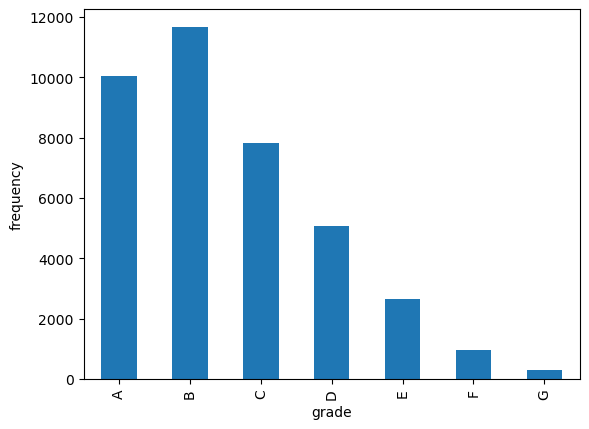

In [49]:
# It can be observed that most of the loans were given to grade b and grade a
df.groupby(['grade'])['grade'].count().plot(kind='bar')
plt.ylabel('frequency')
plt.show()

In [50]:
df['grade'].value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

In [51]:
# df_grade_loan_count = df.groupby(['grade','loan_status'])['loan_status'].count()


<Axes: >

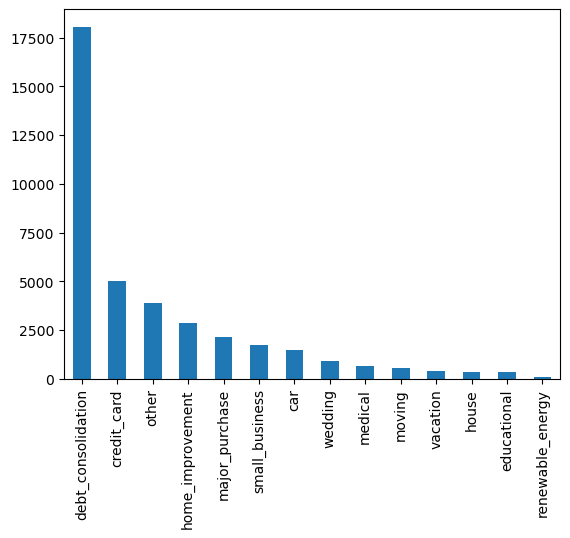

In [52]:
df['purpose'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Installment')

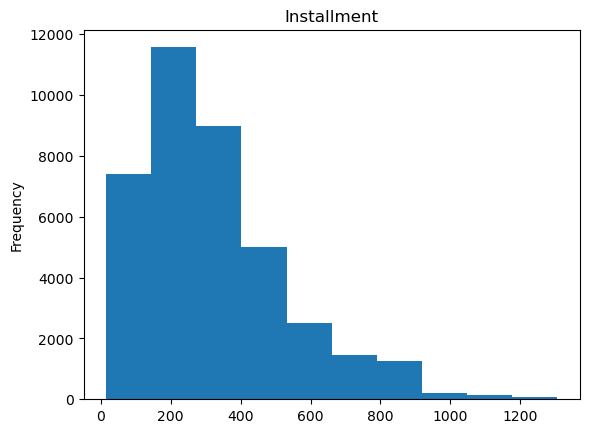

In [53]:
df['installment'].plot(kind='hist')
plt.title('Installment')

In [54]:
df['pub_rec_bankruptcies'].unique()[:-1]

array([0., 1., 2.])

* There is a higher chance of getting charged off as bankruptcies increase
* Avoid borrowers who have records of bankruptcy 

In [55]:
# Check correlation between last 
df[['mths_since_last_delinq','pub_rec_bankruptcies']].corr()

,mths_since_last_delinq,pub_rec_bankruptcies
mths_since_last_delinq,1.000000,0.025681
pub_rec_bankruptcies,0.025681,1.000000


In [56]:
def percentage_with_loan1d(val1,val2) : 
    df_grouped = df.groupby([val1,val2]).agg(count=(val2,'count')).reset_index()
    df_grouped['total'] = df_grouped.groupby([val1])['count'].transform('sum')
    df_grouped['loan ratio'] = df_grouped['count'] / df_grouped['total']
    return df_grouped

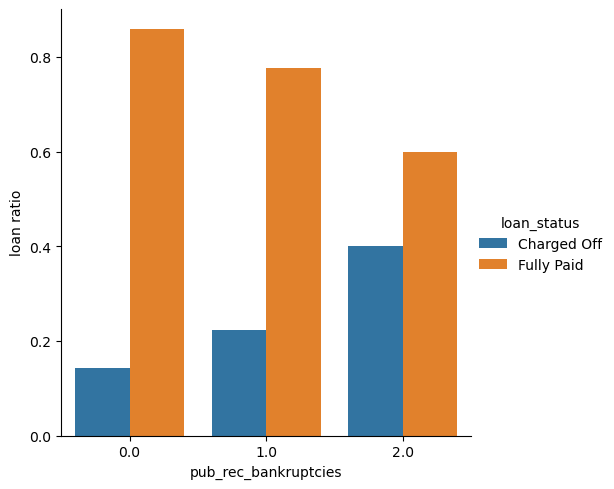

In [57]:

sns.catplot(data=percentage_with_loan1d('pub_rec_bankruptcies','loan_status'),x='pub_rec_bankruptcies',y='loan ratio',hue='loan_status',kind='bar')

<Axes: ylabel='Frequency'>

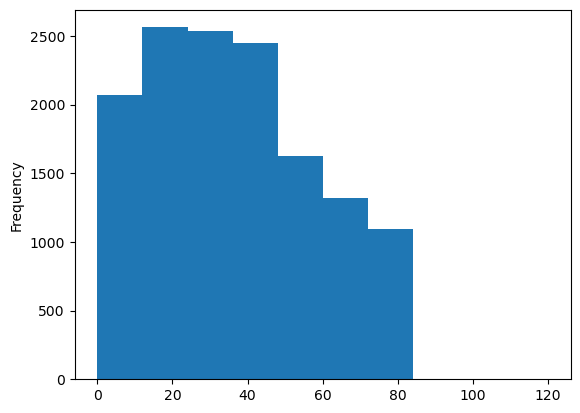

In [58]:
df['mths_since_last_delinq'].plot(kind='hist')

In [59]:
df['mths_since_last_delinq'].describe()

count    13672.000000
mean        35.882534
std         22.028093
min          0.000000
25%         18.000000
50%         34.000000
75%         52.000000
max        120.000000
Name: mths_since_last_delinq, dtype: float64

In [60]:
# Assuming Null values in last_deliquency represent borrowers who had a deliquency

In [61]:
df['last_deliquency'] =pd.qcut(df['mths_since_last_delinq'],q=6)
# df['last_deliquency'] = np.where(df['mths_since_last_delinq'] == 0,pd.Interval(left=-1,right=0,closed='right'),df['last_deliquency'])
# df['last_deliquency'] = np.where(df['mths_since_last_delinq'].isna(),pd.Interval(left=-2,right=-1,closed='right'),df['last_deliquency'])

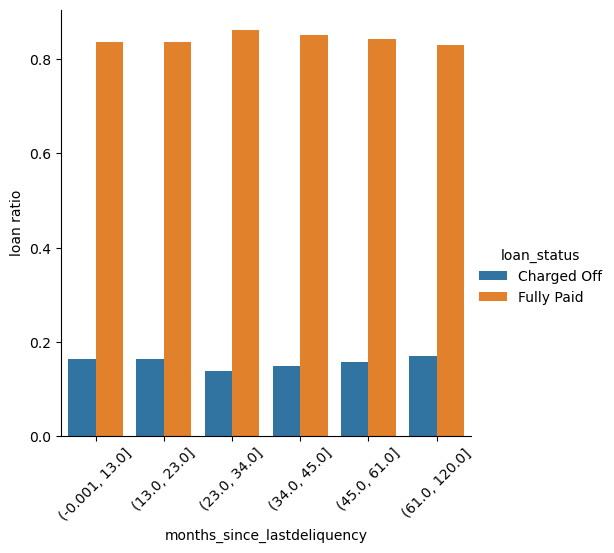

In [62]:
sns.catplot(data=percentage_with_loan1d('last_deliquency','loan_status'),x='last_deliquency',y='loan ratio',hue='loan_status',kind='bar')
plt.xticks(rotation=45)
plt.xlabel('months_since_lastdeliquency')
plt.show()

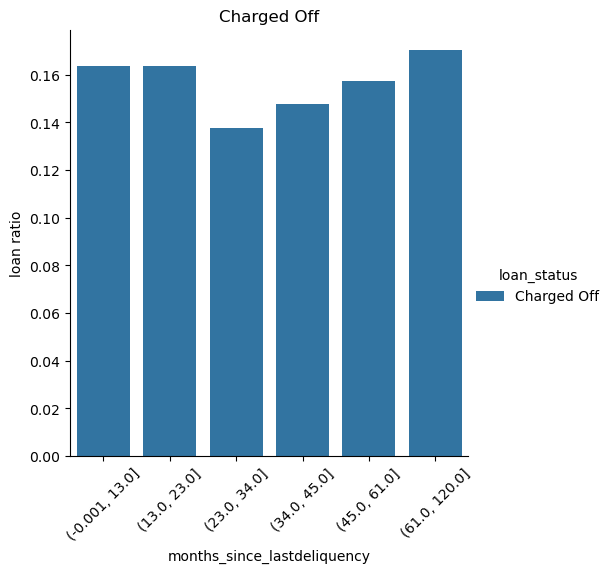

In [63]:
df_plot = percentage_with_loan1d('last_deliquency','loan_status')
sns.catplot(data=df_plot[df_plot['loan_status'] == 'Charged Off'],x='last_deliquency',y='loan ratio',hue='loan_status',kind='bar')
plt.xticks(rotation=45)
plt.xlabel('months_since_lastdeliquency')
plt.title('Charged Off')
plt.show()

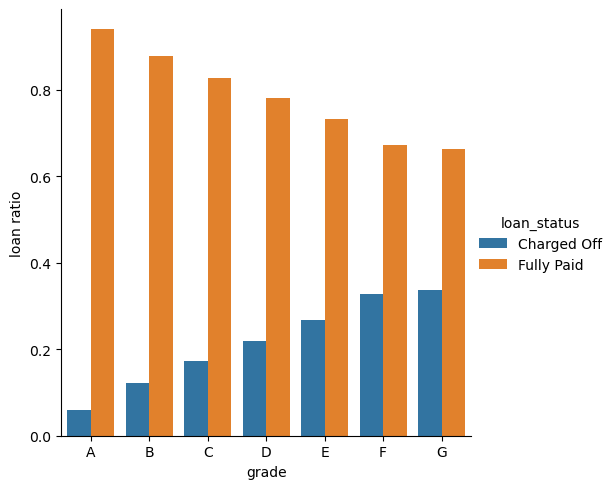

In [64]:

sns.catplot(data=percentage_with_loan1d('grade','loan_status'),x='grade',y='loan ratio',hue='loan_status',kind='bar')
# plt.xticks(rotation=45)
plt.show()

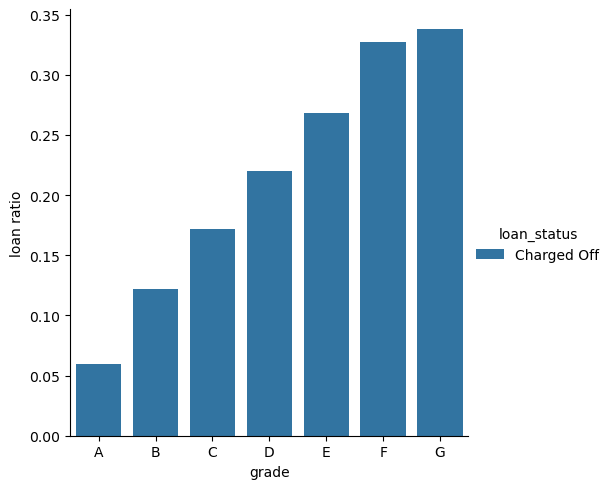

In [65]:
df_plot = percentage_with_loan1d('grade','loan_status')
sns.catplot(data=df_plot[df_plot['loan_status'] == 'Charged Off'],x='grade',y='loan ratio',hue='loan_status',kind='bar')
# plt.xticks(rotation=45)
plt.show()

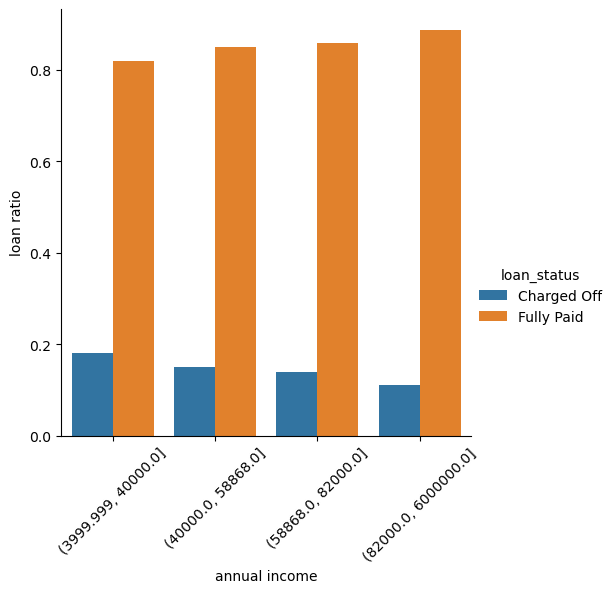

In [66]:
df['annual_income_cat'] =pd.qcut(df['annual_inc'],q=4)
sns.catplot(data=percentage_with_loan1d('annual_income_cat','loan_status'),x='annual_income_cat',y='loan ratio',hue='loan_status',kind='bar')
plt.xticks(rotation=45)
plt.xlabel('annual income')
plt.show()

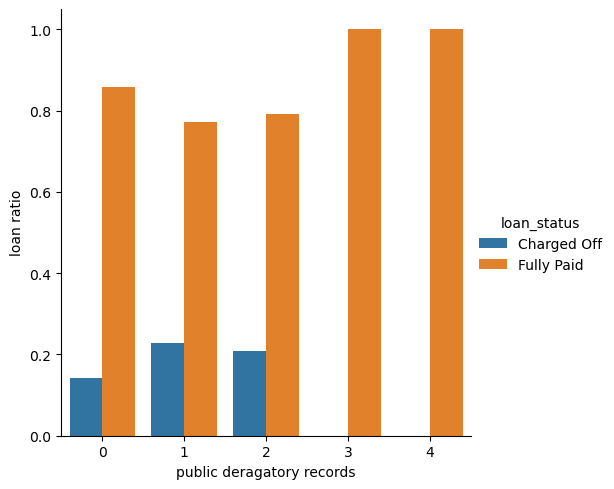

In [67]:
# df['pub_rec'].unique()
sns.catplot(data=percentage_with_loan1d('pub_rec','loan_status'),x='pub_rec',y='loan ratio',hue='loan_status',kind='bar')
plt.xlabel("public deragatory records")
plt.show()

In [68]:
df['installment_cat'],inst_bins = pd.qcut(df['installment'],q=4,labels=['low amnt','avg amnt','above avg amnt','high amnt'],retbins=True)

In [69]:
df  = df.rename(columns = {'installment_cat' : 'monthly_installment_cat'})

In [70]:
interval_installment  = df['installment'].value_counts(bins=4).index

In [71]:
df['installment'].value_counts(bins=4)

(14.399000000000001, 338.065]    23960
(338.065, 660.44]                11466
(660.44, 982.815]                 2896
(982.815, 1305.19]                 255
Name: installment, dtype: int64

In [72]:
def installment_interval_categories(x) : 
    if x > interval_installment[0].left and x<= interval_installment[0].right : 
        return 'small amount'
    elif x > interval_installment[1].left and x<= interval_installment[1].right :
        return 'avg amount'
    elif x > interval_installment[2].left and x<= interval_installment[2].right :
        return 'above avg amount'
    else :
        return 'large amount'
    
df['monthly_installment_cat'] = df['installment'].apply(lambda x : installment_interval_categories(x) if x is not np.NaN else None)

In [73]:
df['monthly_income'] = df['annual_inc'] / 12

In [74]:
df['monthly_income'].describe()

count     38577.000000
mean       5731.497807
std        5351.556817
min         333.333333
25%        3333.333333
50%        4905.666667
75%        6833.333333
max      500000.000000
Name: monthly_income, dtype: float64

In [75]:
# df['annual_income_cat'],inc_bins = pd.qcut(df['annual_inc'],q=4,labels=['low income','avg income','above avg income','high income'],retbins=True)

In [76]:
df['monthly_income_cat'],inc_bins = pd.qcut(df['monthly_income'],q=4,labels=['low income','avg income','above avg income','high income'],retbins=True)

In [77]:
inc_bins

array([3.33333333e+02, 3.33333333e+03, 4.90566667e+03, 6.83333333e+03,
       5.00000000e+05])

In [78]:
interval_installment

IntervalIndex([(14.399000000000001, 338.065], (338.065, 660.44], (660.44, 982.815], (982.815, 1305.19]], dtype='interval[float64, right]')

In [79]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [80]:
# Make bins out of year of experience
def cat_experience(years) :
    val = int(re.findall(r'\d+',years)[0])
    if val == 1 :
        return 'upto 1 year'
    if val >=2 and val <=5 : 
        return '2-5 years'
    if val > 5 and val < 10 :
        return '6-9 years'
    else :
        return 'atleast 10 years'
df['years_exp'] = df['emp_length'].apply(lambda x : cat_experience(x) if x is not np.NaN else None)

In [81]:
df["years_exp"] = df["years_exp"].astype('category').cat.set_categories(["upto 1 year","2-5 years","6-9 years","atleast 10 years"], ordered=True)

<Axes: >

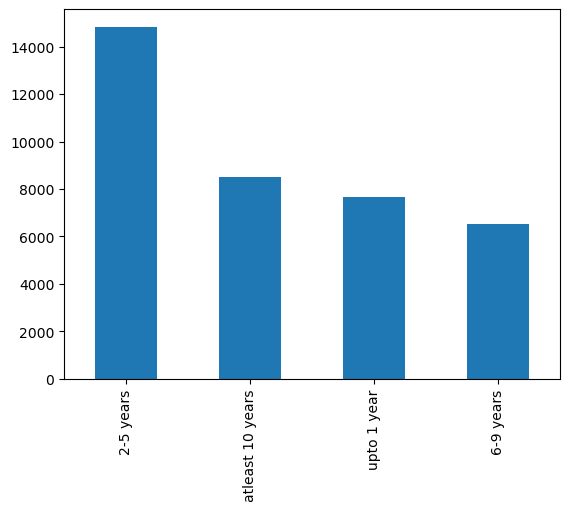

In [82]:
df['years_exp'].value_counts().plot(kind='bar')

In [83]:
df['monthly_installment_cat'].value_counts()

small amount        23960
avg amount          11466
above avg amount     2896
large amount          255
Name: monthly_installment_cat, dtype: int64

In [84]:
# Set monthly installment category as an ordinal variable
df["monthly_installment_cat"] = df["monthly_installment_cat"].astype('category').cat.set_categories(["small amount","avg amount","above avg amount","large amount"], ordered=True)

In [85]:
df['monthly_income_cat'].value_counts()

above avg income    9700
low income          9698
avg income          9591
high income         9588
Name: monthly_income_cat, dtype: int64

In [86]:
def col_split_plots(vals1,vals2) : 
    df_grouped = df.groupby(vals1+vals2).agg(count = ('loan_status','count')).reset_index()
    df_grouped['total'] = df_grouped.groupby(vals1)['count'].transform('sum')
    df_grouped['loan ratio'] = df_grouped['count'] / df_grouped['total']
    return df_grouped
    

# Analyse  loan_status wrt monthly_income_cat and monthly_installment_cat

* Create pivot table for columns monthly income , loan status and monthly installment cat
* Calculate the total frequency of the monthly income column wrt monthly installment amount cat ->  let this be sum
* Get the percentages for each category of annual income . Formula ->  loan status / sum

In [87]:
df_pivot_monthly_amt  = pd.pivot_table(data=df[['monthly_income_cat','loan_status','monthly_installment_cat']],columns=['monthly_income_cat','loan_status'],index='monthly_installment_cat',aggfunc =len ).fillna(0)

In [88]:
for i in df_pivot_monthly_amt.columns.levels[0] :
    df_pivot_monthly_amt[i,'total']  = df_pivot_monthly_amt[i].sum(axis=1)

In [89]:
df_pivot_monthly_amt = df_pivot_monthly_amt[df_pivot_monthly_amt.columns.levels[0]]

In [90]:
df_pivot_monthly_amt

monthly_income_cat       low income                     avg income             \
loan_status             Charged Off Fully Paid   total Charged Off Fully Paid   
monthly_installment_cat                                                         
small amount                 1422.0     6795.0  8217.0       866.0     5581.0   
avg amount                    326.0     1128.0  1454.0       509.0     2343.0   
above avg amount                3.0       24.0    27.0        67.0      223.0   
large amount                    0.0        0.0     0.0         0.0        2.0   

monthly_income_cat              above avg income                     \
loan_status               total      Charged Off Fully Paid   total   
monthly_installment_cat                                               
small amount             6447.0            638.0     4757.0  5395.0   
avg amount               2852.0            556.0     2869.0  3425.0   
above avg amount          290.0            157.0      666.0   823.0   
large amount                2.0             10.0       47.0    57.0   

monthly_income_cat      high income                     
loan_status             Charged Off Fully Paid   total  
monthly_installment_cat                                 
small amount                  355.0     3546.0  3901.0  
avg amount                    427.0     3308.0  3735.0  
above avg amount              273.0     1483.0  1756.0  
large amount                   18.0      178.0   196.0

* It can be observed that no matter the amount of money borrowed the majority of the people tend to pay it back
* This is not suprising because a majority of the borrowered paid the lenders back , this is because the scale of the monthly installments category and the income category are different . The income category has a relatively higher scale . This is a good practice because the loan can be paid if it is affordable by income  
* Here we need to ignore above avg amount and large amount of the monthly installments wrt the low income category , as very few people have taken this category of loan . Also ignore large amount of monthly installments in avg income category
* In the low income category ,borrowers with avg amount are being charged off more .
* For the low income category , giving monthly installments that falls into above avg category can be stopped .
* For the avg income category , there are relatively fewer people in the above avg amount category and the charged off rate seems to be high , this too could be removed along with the large amount category 
* The large amount category can be removed in the above avg income part too 

In [91]:
 pd.concat([df_pivot_monthly_amt[i].apply(lambda x : x[:2] / x[2],axis=1) for i in df_pivot_monthly_amt.columns.levels[0]],keys=df_pivot_monthly_amt.columns.levels[0],axis=1).fillna(0)


monthly_income_cat       low income             avg income             \
loan_status             Charged Off Fully Paid Charged Off Fully Paid   
monthly_installment_cat                                                 
small amount               0.173056   0.826944    0.134326   0.865674   
avg amount                 0.224209   0.775791    0.178471   0.821529   
above avg amount           0.111111   0.888889    0.231034   0.768966   
large amount               0.000000   0.000000    0.000000   1.000000   

monthly_income_cat      above avg income            high income             
loan_status                  Charged Off Fully Paid Charged Off Fully Paid  
monthly_installment_cat                                                     
small amount                    0.118258   0.881742    0.091002   0.908998  
avg amount                      0.162336   0.837664    0.114324   0.885676  
above avg amount                0.190765   0.809235    0.155467   0.844533  
large amount                    0.175439   0.824561    0.091837   0.908163

* There is a clear trend borrowers with lower income tend to get charged off more often . This is true across all categories
* There is a single exception to this scenario , borrowers with low income have a very low default rate . This however is due to the fact that very few people with low income come into the low income category

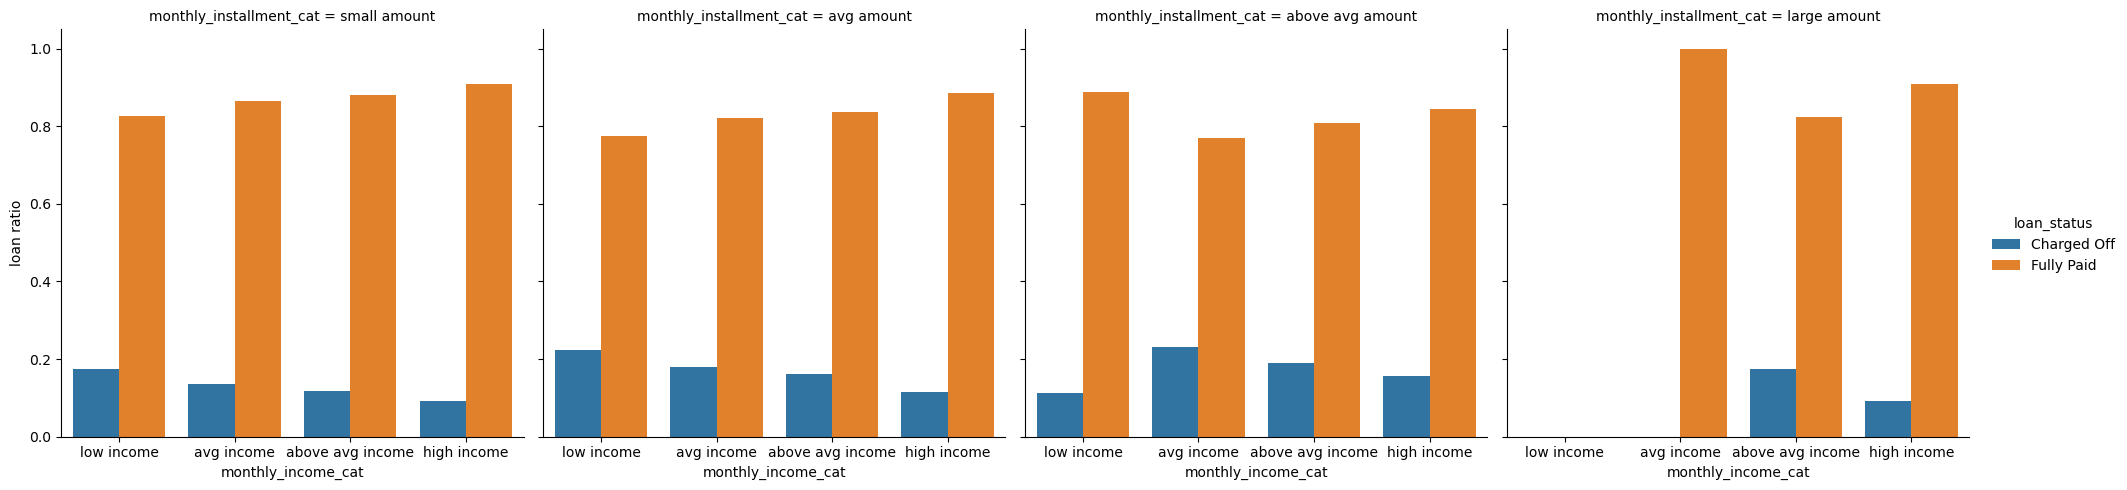

In [92]:

sns.catplot(data=col_split_plots(['monthly_income_cat','monthly_installment_cat'],['loan_status']),x='monthly_income_cat',y='loan ratio',hue='loan_status',kind='bar',col='monthly_installment_cat')

* There seems to be a preference towards the 36 month plan in all the categories 

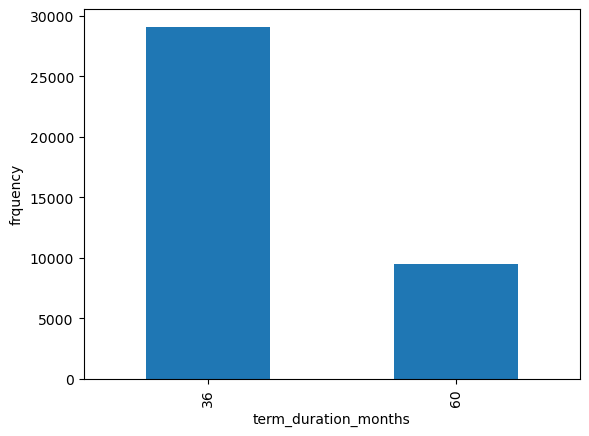

In [93]:
df.groupby(['term_duration_months'])['loan_status'].count().plot(kind='bar')
plt.ylabel('frquency')
plt.show()

In [94]:
pd.pivot_table(data=df[['monthly_income_cat','term_duration_months','monthly_installment_cat','loan_status']],columns=['monthly_income_cat','term_duration_months'],index=['monthly_installment_cat','loan_status'],aggfunc =len ).fillna(0)

monthly_income_cat                  low income         avg income          \
term_duration_months                        36      60         36      60   
monthly_installment_cat loan_status                                         
small amount            Charged Off      972.0   450.0      558.0   308.0   
                        Fully Paid      5753.0  1042.0     4511.0  1070.0   
avg amount              Charged Off      192.0   134.0      225.0   284.0   
                        Fully Paid       943.0   185.0     1725.0   618.0   
above avg amount        Charged Off        3.0     0.0       41.0    26.0   
                        Fully Paid        23.0     1.0      189.0    34.0   
large amount            Charged Off        0.0     0.0        0.0     0.0   
                        Fully Paid         0.0     0.0        2.0     0.0   

monthly_income_cat                  above avg income        high income  \
term_duration_months                              36     60          36   
monthly_installment_cat loan_status                                       
small amount            Charged Off            364.0  274.0       215.0   
                        Fully Paid            3772.0  985.0      2824.0   
avg amount              Charged Off            236.0  320.0       170.0   
                        Fully Paid            2063.0  806.0      2247.0   
above avg amount        Charged Off             79.0   78.0       147.0   
                        Fully Paid             522.0  144.0      1073.0   
large amount            Charged Off              9.0    1.0        16.0   
                        Fully Paid              47.0    0.0       175.0   

monthly_income_cat                           
term_duration_months                     60  
monthly_installment_cat loan_status          
small amount            Charged Off   140.0  
                        Fully Paid    722.0  
avg amount              Charged Off   257.0  
                        Fully Paid   1061.0  
above avg amount        Charged Off   126.0  
                        Fully Paid    410.0  
large amount            Charged Off     2.0  
                        Fully Paid      3.0

* 36 months i.e 3 year installment is being charged off less than 60 month loan i.e 5 year installment
* Give only 36 months installment option
* lower the income higher the deafault rate(observed on both 36 and 60 months), higher the income higher the loan closure rate (payment complete)
* 36 months duration always gets the preference as it has a low default rate and high closure rate
* Then again here too there is some noise causing slight fluctuations in the data, this noise primarily due to there being very few records in some of the categories

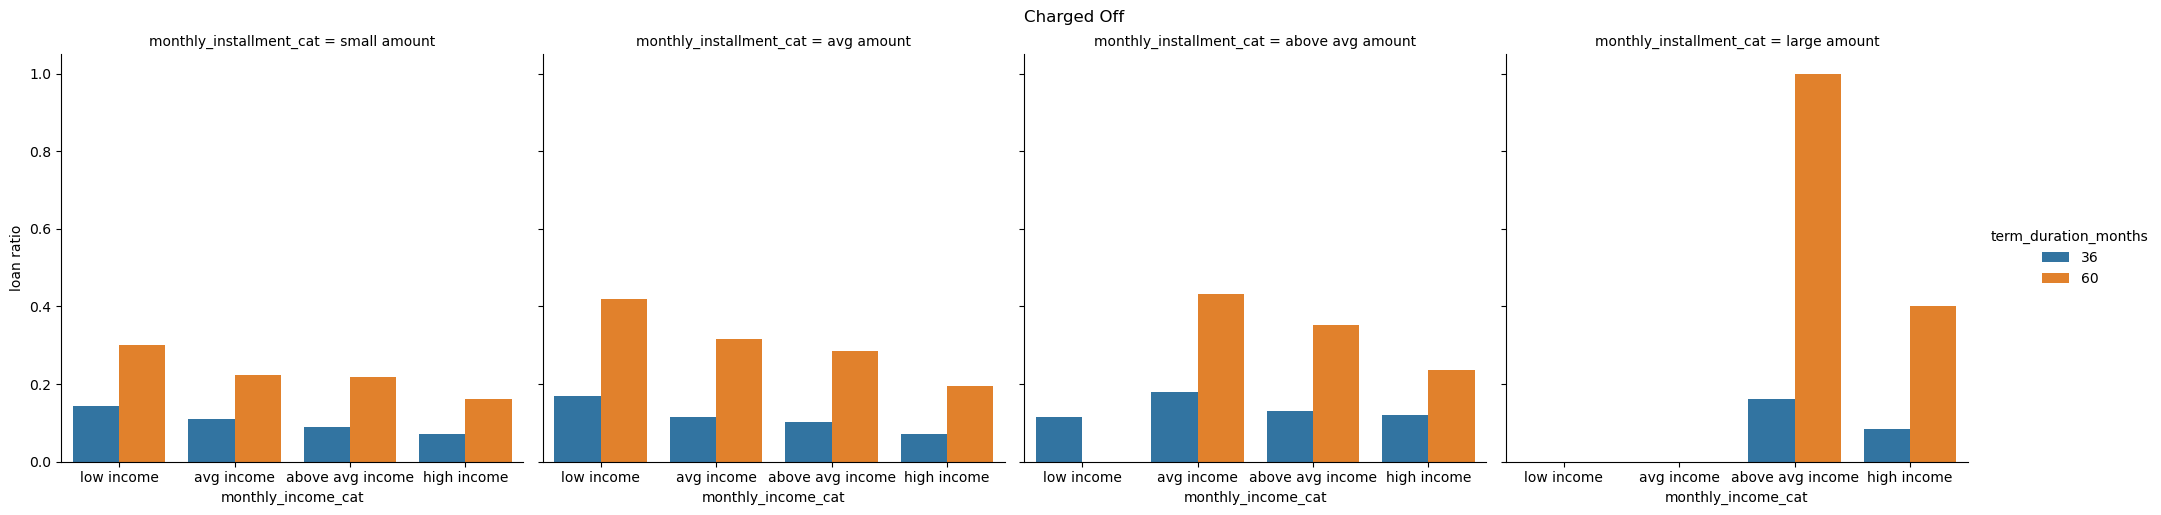

In [95]:
df_plot  = col_split_plots(['monthly_income_cat','term_duration_months','monthly_installment_cat'],['loan_status'])
gmap = sns.catplot(data=df_plot[df_plot['loan_status'] == 'Charged Off'],x='monthly_income_cat',y='loan ratio',hue='term_duration_months',kind='bar',col='monthly_installment_cat')
# plt.title('Charged Off')
gmap.fig.suptitle('Charged Off',y=1.02)
plt.show()


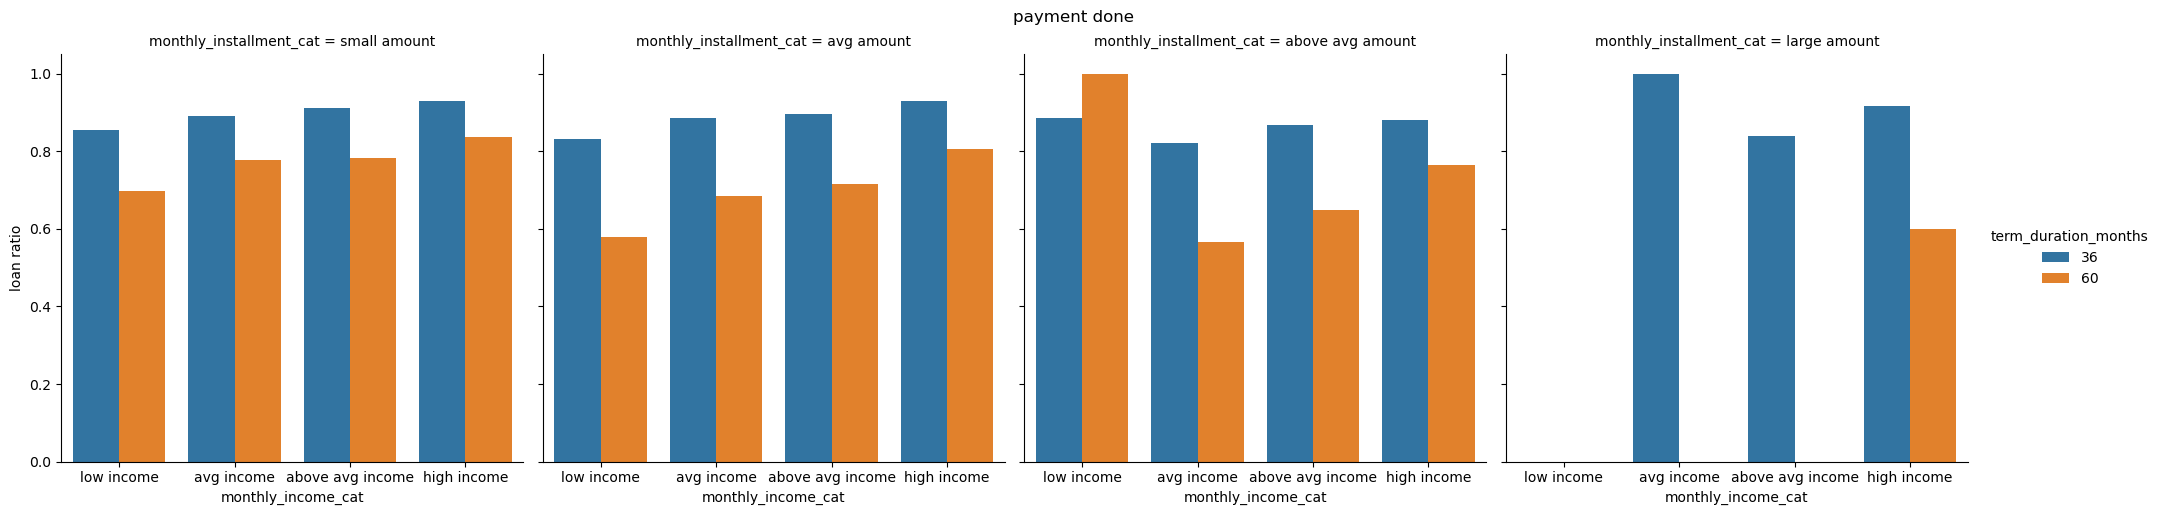

In [96]:
df_plot  = col_split_plots(['monthly_income_cat','term_duration_months','monthly_installment_cat'],['loan_status'])
gmap = sns.catplot(data=df_plot[df_plot['loan_status'] == 'Fully Paid'],x='monthly_income_cat',y='loan ratio',hue='term_duration_months',kind='bar',col='monthly_installment_cat')
# plt.title('payment done')
gmap.fig.suptitle('payment done',y=1.02)
plt.show()


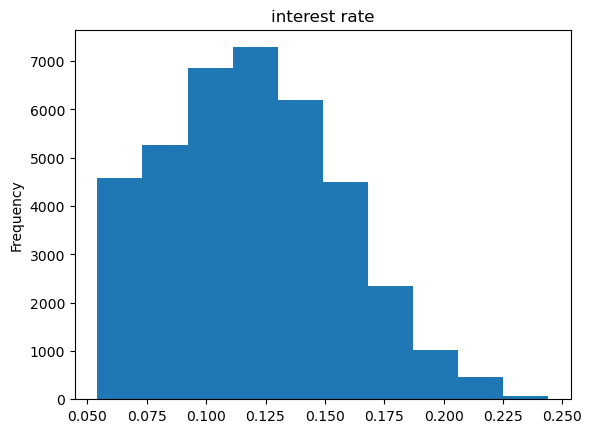

In [97]:
# Binning Interest Rate
df['int_rate'].plot(kind='hist')
plt.title('interest rate')
plt.show()

In [98]:
df['int_rate'].value_counts(bins=3)

(0.053, 0.117]    19326
(0.117, 0.181]    17017
(0.181, 0.244]     2234
Name: int_rate, dtype: int64

In [99]:
df['monthly_int_rate'] = df['int_rate'] / 12

In [100]:
df['monthly_int_rate'].value_counts(bins=3)

(0.0034999999999999996, 0.00979]    19326
(0.00979, 0.0151]                   17017
(0.0151, 0.0203]                     2234
Name: monthly_int_rate, dtype: int64

In [101]:
df['interest_rate_cat'],int_bins = pd.qcut(df['int_rate'],q=3,labels = ['low','avg','high'],retbins=True)

In [102]:
int_bins

array([0.0542, 0.1036, 0.1349, 0.244 ])

In [103]:
df['monthly_interest_rate_cat'],mint_bins = pd.qcut(df['monthly_int_rate'],q=3,labels = ['low','avg','high'],retbins=True)

In [104]:
mint_bins

array([0.00451667, 0.00863333, 0.01124167, 0.02033333])

# Analyse intereset_rate_cat and loan_status wrt monthly_income_cat and monthly_installment_cat

* It can be observed that as interest rate increases there is a higher possibility of a borrower getting charged off

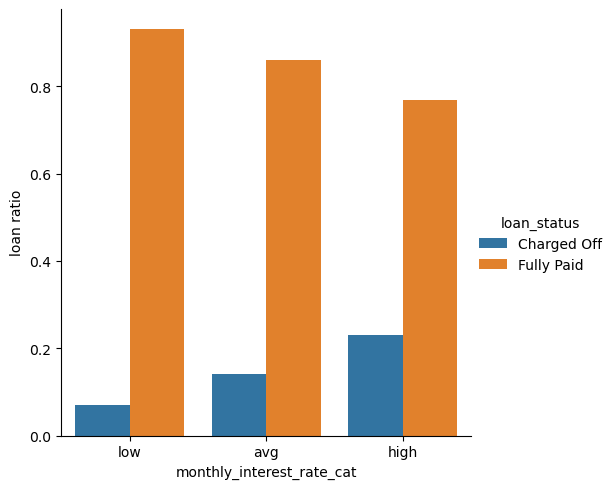

In [105]:

sns.catplot(data=col_split_plots(['monthly_interest_rate_cat'],['loan_status']),x='monthly_interest_rate_cat',y='loan ratio',hue='loan_status',kind='bar')

In [106]:
df_status_interest_rate = df.groupby(['monthly_income_cat','monthly_installment_cat','monthly_interest_rate_cat','loan_status'])[['loan_status']].agg(status_count = ('loan_status','count'))

In [107]:
df_status_interest_rate['total'] = df_status_interest_rate.groupby(['monthly_income_cat','monthly_installment_cat','monthly_interest_rate_cat'])['status_count'].transform('sum')

In [108]:
df_status_interest_rate['loan ratio'] = df_status_interest_rate['status_count'] / df_status_interest_rate['total']

In [109]:
df_status_interest_rate = df_status_interest_rate.reset_index() 

In [110]:
df_status_interest_rate  = col_split_plots(['monthly_income_cat','monthly_installment_cat','monthly_interest_rate_cat'],['loan_status'])

* There is a clear trend between interest rate and charging-off
* Lower interest rate gives better chance of getting full amount back
* While having high interest rate gives better chance of charging off 
* Also having low interest at any monthly income rises your chances of fully paid

In [111]:
pd.crosstab(index =[df_status_interest_rate['monthly_installment_cat'],df_status_interest_rate['monthly_interest_rate_cat']],columns = [df_status_interest_rate['monthly_income_cat'],df_status_interest_rate['loan_status']],values =df_status_interest_rate['loan ratio'],aggfunc=np.sum)

monthly_income_cat                                 low income             \
loan_status                                       Charged Off Fully Paid   
monthly_installment_cat monthly_interest_rate_cat                          
small amount            low                          0.103587   0.896413   
                        avg                          0.181788   0.818212   
                        high                         0.253322   0.746678   
avg amount              low                          0.098930   0.901070   
                        avg                          0.224265   0.775735   
                        high                         0.311567   0.688433   
above avg amount        low                          0.000000   1.000000   
                        avg                          0.133333   0.866667   
                        high                         0.100000   0.900000   
large amount            low                          0.000000   0.000000   
                        avg                          0.000000   0.000000   
                        high                         0.000000   0.000000   

monthly_income_cat                                 avg income             \
loan_status                                       Charged Off Fully Paid   
monthly_installment_cat monthly_interest_rate_cat                          
small amount            low                          0.077071   0.922929   
                        avg                          0.138421   0.861579   
                        high                         0.221527   0.778473   
avg amount              low                          0.067504   0.932496   
                        avg                          0.156436   0.843564   
                        high                         0.255602   0.744398   
above avg amount        low                          0.068966   0.931034   
                        avg                          0.198347   0.801653   
                        high                         0.292857   0.707143   
large amount            low                          0.000000   0.000000   
                        avg                          0.000000   1.000000   
                        high                         0.000000   1.000000   

monthly_income_cat                                above avg income             \
loan_status                                            Charged Off Fully Paid   
monthly_installment_cat monthly_interest_rate_cat                               
small amount            low                               0.055814   0.944186   
                        avg                               0.132808   0.867192   
                        high                              0.215483   0.784517   
avg amount              low                               0.060049   0.939951   
                        avg                               0.113505   0.886495   
                        high                              0.263909   0.736091   
above avg amount        low                               0.044944   0.955056   
                        avg                               0.142857   0.857143   
                        high                              0.250559   0.749441   
large amount            low                               0.000000   1.000000   
                        avg                               0.100000   0.900000   
                        high                              0.275862   0.724138   

monthly_income_cat                                high income             
loan_status                                       Charged Off Fully Paid  
monthly_installment_cat monthly_interest_rate_cat                         
small amount            low                          0.041143   0.958857  
                        avg                          0.104375   0.895625  
                        high                         0.173349   0.826651  
avg amount              low                         

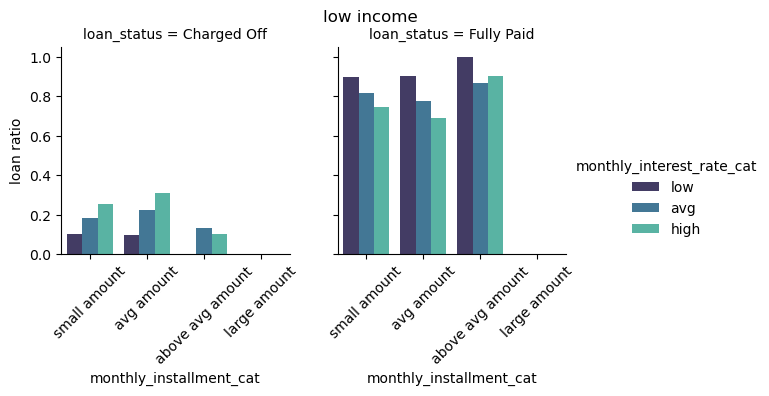

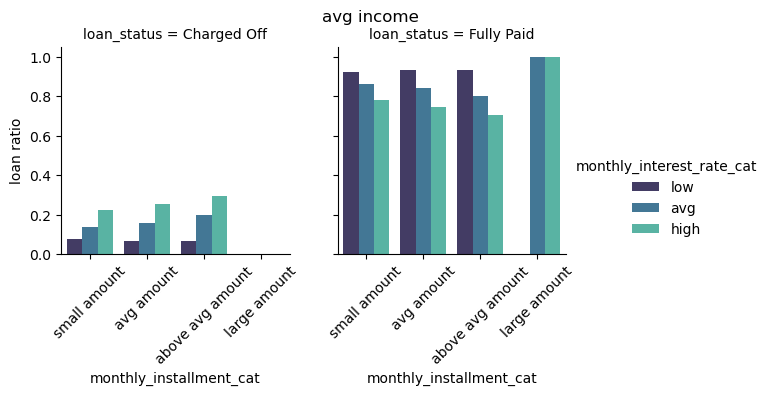

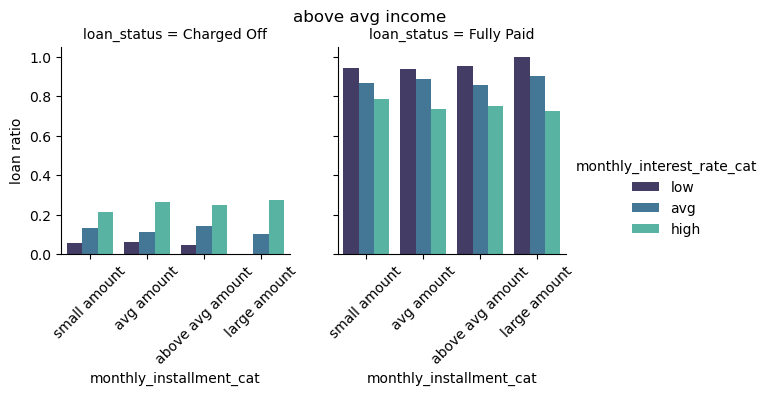

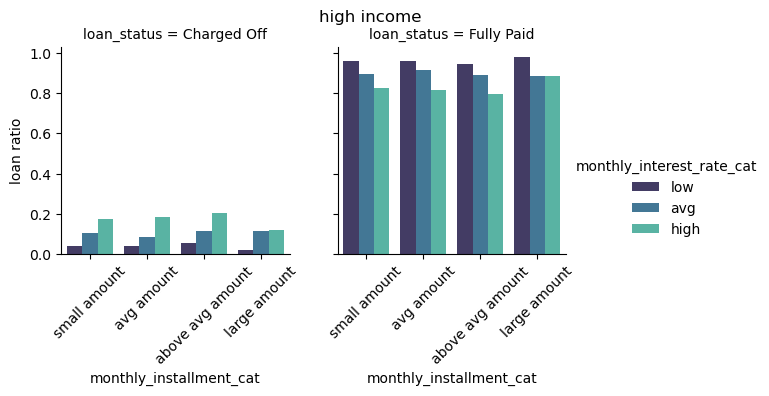

In [112]:
# fig, axs = plt.subplots(df['monthly_income_cat'].nunique(),2,figsize=(25,35))
# c= 0
m_i_cat = df_status_interest_rate['monthly_income_cat'].unique()
for idx,i in enumerate(m_i_cat) : 
    gmap = sns.catplot(data=df_status_interest_rate[df_status_interest_rate['monthly_income_cat'] == i],x='monthly_installment_cat',y='loan ratio',hue='monthly_interest_rate_cat',height=3,kind='bar',col='loan_status',palette='mako')
    for ax in gmap.axes.flat:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    gmap.fig.suptitle(m_i_cat[idx],y=1.01)
    
plt.show()

In [113]:
# pd.crosstab(index =[df_status_years_exp['monthly_installment_cat'],df_status_years_exp['interest_rate_cat']],columns = [df_status_years_exp['monthly_income_cat'],df_status_years_exp['loan_status']],values =df_status_years_exp['loan ratio'],aggfunc=np.sum)

# Analyse years_exp and loan_status wrt monthly_income_cat and monthly_installment_cat

* No particular trend is visible with years of experience


In [114]:
df_years_exp = df.groupby(['years_exp','loan_status']).agg(count = ('loan_status','count')).reset_index()

In [115]:
df_years_exp['total'] = df_years_exp.groupby(['years_exp'])['count'].transform('sum')

In [116]:
df_years_exp['loan ratio'] = df_years_exp['count'] / df_years_exp['total']

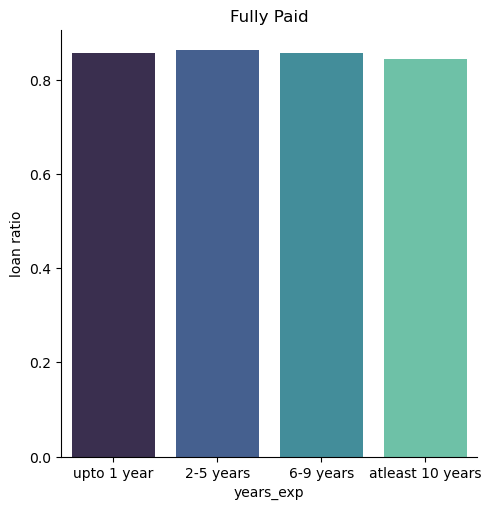

In [117]:
sns.catplot(data=df_years_exp[df_years_exp['loan_status'] == 'Fully Paid'],x='years_exp',y='loan ratio',kind='bar',palette='mako')
plt.title('Fully Paid')
plt.show()

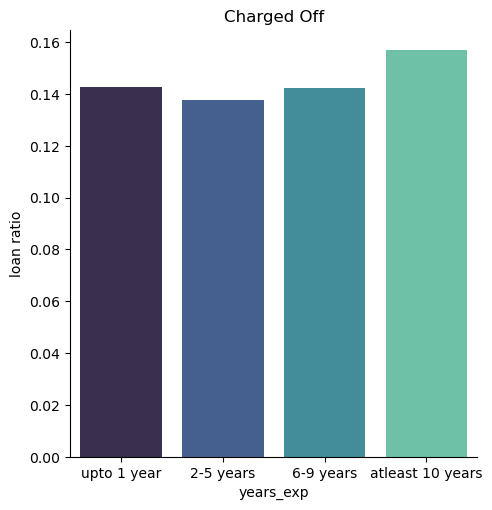

In [118]:
sns.catplot(data=df_years_exp[df_years_exp['loan_status'] == 'Charged Off'],x='years_exp',y='loan ratio',kind='bar',palette='mako')
plt.title("Charged Off")
plt.show()

In [119]:
df_status_years_exp = df.groupby(['monthly_income_cat','monthly_installment_cat','years_exp','loan_status'])[['loan_status']].agg(status_count = ('loan_status','count'))

In [120]:
df_status_years_exp['total'] = df_status_years_exp.groupby(['monthly_income_cat','monthly_installment_cat','years_exp'])['status_count'].transform('sum')

In [121]:
df_status_years_exp['loan ratio'] = df_status_years_exp['status_count'] / df_status_years_exp['total']

In [122]:
df_status_years_exp = df_status_years_exp.reset_index() 

* Borrowers with 10+ years of experience have a high loan close rate(full paid) at above avg amount

In [123]:
pd.crosstab(index =[df_status_years_exp['monthly_installment_cat'],df_status_years_exp['years_exp']],columns = [df_status_years_exp['monthly_income_cat'],df_status_years_exp['loan_status']],values =df_status_years_exp['loan ratio'],aggfunc=np.sum)

monthly_income_cat                        low income             avg income  \
loan_status                              Charged Off Fully Paid Charged Off   
monthly_installment_cat years_exp                                             
small amount            upto 1 year         0.163873   0.836127    0.133068   
                        2-5 years           0.164535   0.835465    0.122761   
                        6-9 years           0.173713   0.826287    0.131742   
                        atleast 10 years    0.188279   0.811721    0.158279   
avg amount              upto 1 year         0.248485   0.751515    0.163599   
                        2-5 years           0.195980   0.804020    0.161496   
                        6-9 years           0.216327   0.783673    0.171322   
                        atleast 10 years    0.266667   0.733333    0.209970   
above avg amount        upto 1 year         0.000000   1.000000    0.229167   
                        2-5 years           0.142857   0.857143    0.189655   
                        6-9 years           0.250000   0.750000    0.170732   
                        atleast 10 years    0.000000   1.000000    0.311688   
large amount            upto 1 year         0.000000   0.000000    0.000000   
                        2-5 years           0.000000   0.000000    0.000000   
                        6-9 years           0.000000   0.000000    0.000000   
                        atleast 10 years    0.000000   0.000000    0.000000   

monthly_income_cat                                  above avg income  \
loan_status                              Fully Paid      Charged Off   
monthly_installment_cat years_exp                                      
small amount            upto 1 year        0.866932         0.113413   
                        2-5 years          0.877239         0.112481   
                        6-9 years          0.868258         0.107692   
                        atleast 10 years   0.841721         0.136957   
avg amount              upto 1 year        0.836401         0.129091   
                        2-5 years          0.838504         0.147426   
                        6-9 years          0.828678         0.167975   
                        atleast 10 years   0.790030         0.194475   
above avg amount        upto 1 year        0.770833         0.191304   
                        2-5 years          0.810345         0.194079   
                        6-9 years          0.829268         0.122581   
                        atleast 10 years   0.688312         0.222689   
large amount            upto 1 year        1.000000         0.000000   
                        2-5 years          1.000000         0.136364   
                        6-9 years          0.000000         0.111111   
                        atleast 10 years   0.000000         0.315789   

monthly_income_cat                                  high income             
loan_status                              Fully Paid Charged Off Fully Paid  
monthly_installment_cat years_exp                                           
small amount            upto 1 year        0.886587    0.090214   0.909786  
                        2-5 years          0.887519    0.087994   0.912006  
                        6-9 years          0.892308    0.103448   0.896552  
                        atleast 10 years   0.863043    0.086920   0.913080  
avg amount              upto 1 year        0.870909    0.100813   0.899187  
                        2-5 years          0.852574    0.110420   0.889580  
                        6-9 years          0.832025    0.123010   0.876990  
                        atleast 10 years   0.805525    0.120536   0.879464  
above avg amount        upto 1 year        0.808696    0.149466   0.850534  
                        2-5 years          0.805921    0.150613   0.849387  
                        6-9 years          0.877419    0.151703   0.848297  
                        atleast 10 years   0.777311

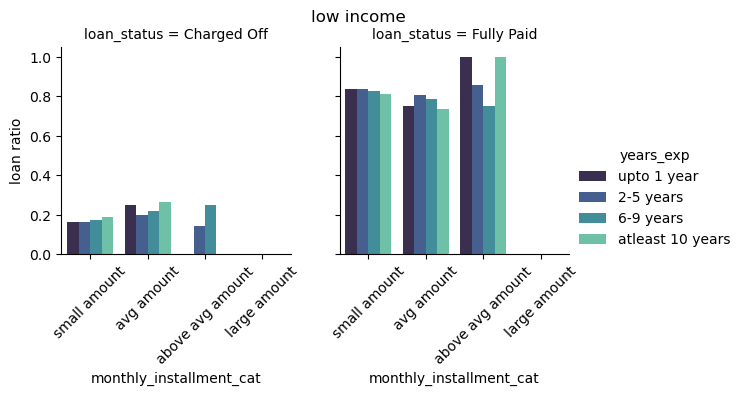

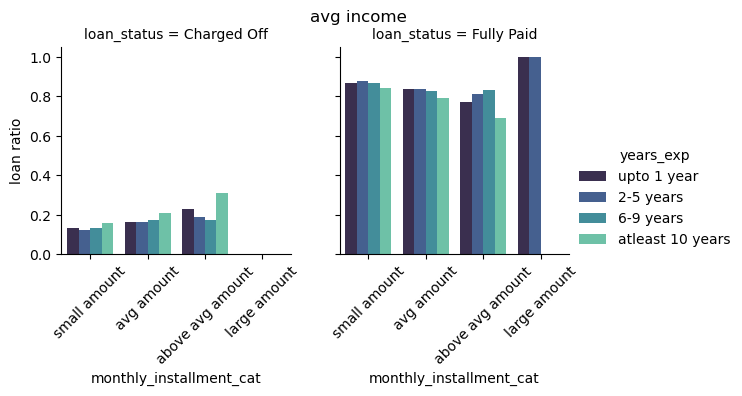

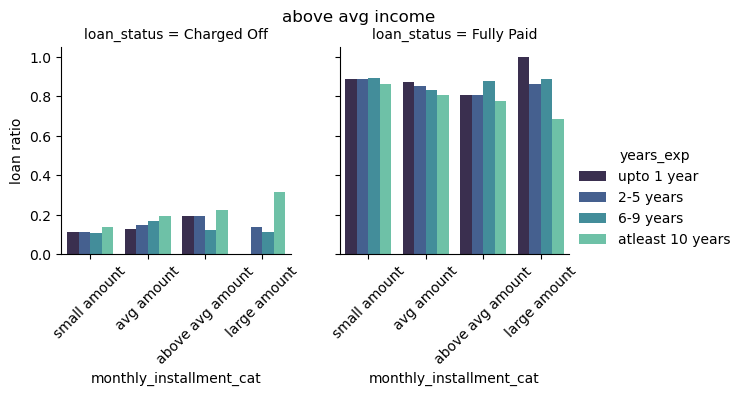

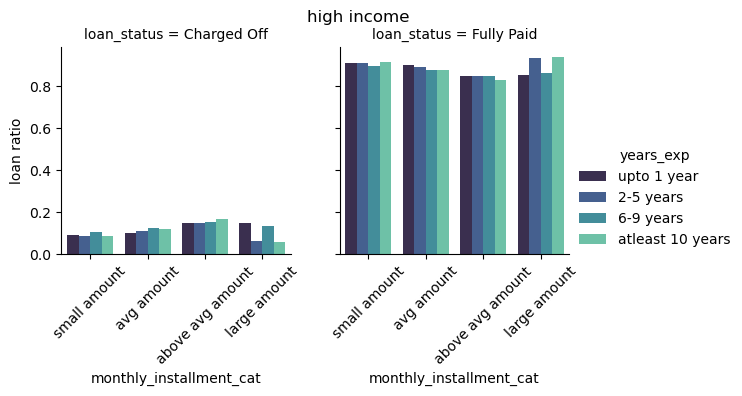

In [124]:

m_i_cat = df_status_interest_rate['monthly_income_cat'].unique()
for idx,i in enumerate(m_i_cat) : 
    gmap = sns.catplot(data=df_status_years_exp[df_status_years_exp['monthly_income_cat']==i],x='monthly_installment_cat',y='loan ratio',hue='years_exp',kind='bar',height=3,col='loan_status',palette='mako')
    for ax in gmap.axes.flat:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    gmap.fig.suptitle(m_i_cat[idx],y=1.01)
    
plt.show()

In [125]:
purpose_cumsum = (df.purpose.value_counts() / df.purpose.value_counts().sum()).cumsum()
purpose_list = purpose_cumsum[purpose_cumsum < 0.96].index

In [126]:
df_grade_purpose = df[df.purpose.isin(purpose_list)].groupby(['grade','purpose','loan_status']).agg(count = ('loan_status','count')).reset_index()

In [127]:
df_grade_purpose['total'] = df_grade_purpose.groupby(['grade','purpose'])['count'].transform('sum')

In [128]:
df_grade_purpose['loan ratio'] = df_grade_purpose['count'] / df_grade_purpose['total']

* Medical Loans in category G are charged off more often (almost hits 70%), followed by car loans
* Wedding loans are consistently being paid off at a high rate 
* Small Business loans are being consistently charged at a high rate

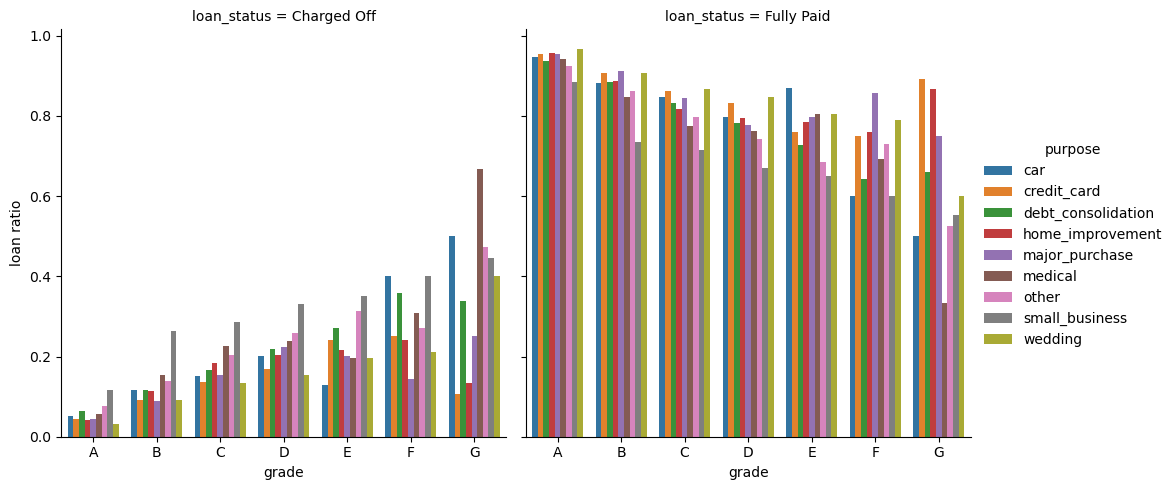

In [129]:
sns.catplot(data=df_grade_purpose,x='grade',y='loan ratio',hue='purpose',kind='bar',col='loan_status')

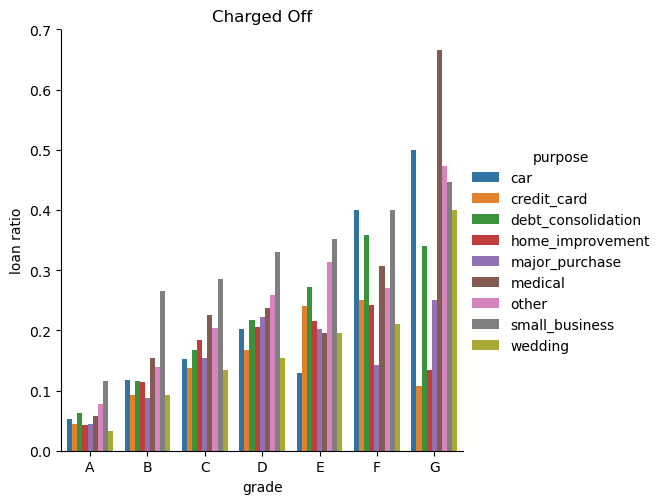

In [130]:
sns.catplot(data=df_grade_purpose[df_grade_purpose['loan_status'] == 'Charged Off'],x='grade',y='loan ratio',hue='purpose',kind='bar')
plt.title('Charged Off')
plt.show()

In [131]:
df_purpose  = df[df.purpose.isin(purpose_list)].groupby(['purpose','loan_status']).agg(count = ('loan_status','count')).reset_index()

In [132]:
df_purpose['total'] = df_purpose.groupby(['purpose'])['count'].transform('sum')

In [133]:
df_purpose['loan ratio'] = df_purpose['count'] / df_purpose['total']

In [134]:
df_purpose

,purpose,loan_status,count,total,loan ratio
0,car,Charged Off,160,1499,0.106738
1,car,Fully Paid,1339,1499,0.893262
2,credit_card,Charged Off,542,5027,0.107818
3,credit_card,Fully Paid,4485,5027,0.892182
4,debt_consolidation,Charged Off,2767,18055,0.153254
5,debt_consolidation,Fully Paid,15288,18055,0.846746
6,home_improvement,Charged Off,347,2875,0.120696
7,home_improvement,Fully Paid,2528,2875,0.879304
8,major_purchase,Charged Off,222,2150,0.103256
9,major_purchase,Fully Paid,1928,2150,0.896744


* Loans taken for small_businesses are usually Charged Off
* Followed by other , medical and debt_consolidation

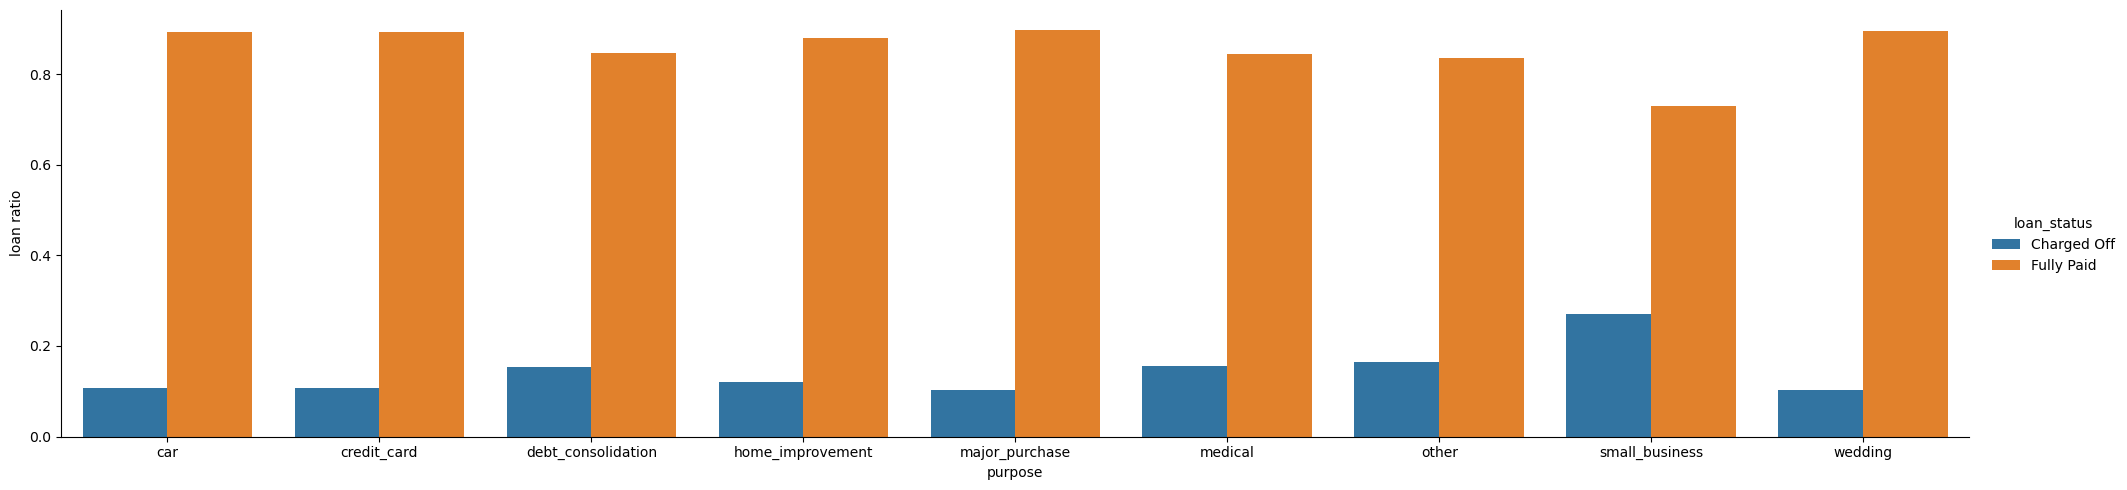

In [135]:
sns.catplot(data=df_purpose,x='purpose',y='loan ratio',hue='loan_status',kind='bar',aspect=4)

Text(0.5, 1.0, 'Fully Paid')

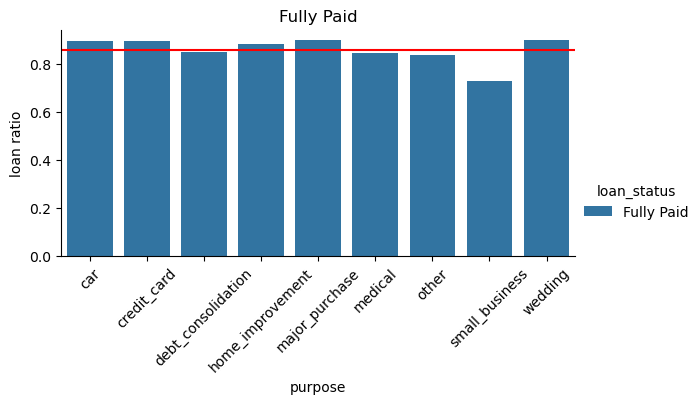

In [136]:
sns.catplot(data=df_purpose[df_purpose['loan_status'] == 'Fully Paid'],x='purpose',y='loan ratio',hue='loan_status',kind='bar',aspect=2,height=3)
plt.xticks(rotation=45)
plt.axhline(np.mean(df_purpose[df_purpose['loan_status'] == 'Fully Paid']['loan ratio']),color='red')
plt.title('Fully Paid')

Text(0.5, 1.0, 'Charged Off')

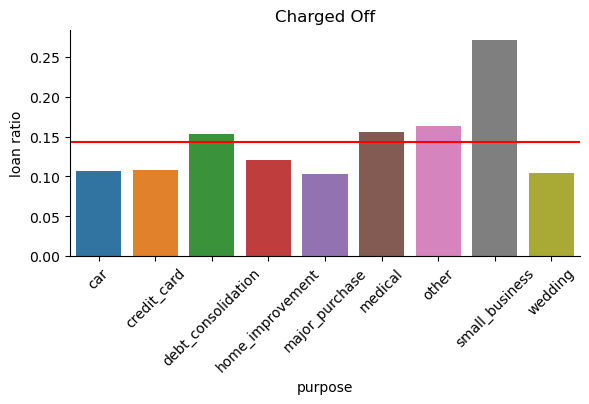

In [137]:
sns.catplot(data=df_purpose[df_purpose['loan_status'] == 'Charged Off'],x='purpose',y='loan ratio',kind='bar',aspect=2,height=3)
plt.xticks(rotation=45)
plt.axhline(np.mean(df_purpose[df_purpose['loan_status'] == 'Charged Off']['loan ratio']),color='red')
plt.title('Charged Off')

In [138]:
open_acc_cumsum = (df['open_acc'].value_counts() / df['open_acc'].value_counts().sum()).cumsum() 
open_acc_list = open_acc_cumsum[open_acc_cumsum < .9].index

In [139]:
df_open_acc = df[df['open_acc'].isin(open_acc_list)].groupby(['open_acc','loan_status']).agg(count = ('loan_status','count')).reset_index()

In [140]:
df_open_acc['total'] = df_open_acc.groupby(['open_acc'])['count'].transform('sum')

In [141]:
df_open_acc['loan ratio'] = df_open_acc['count']/df_open_acc['total']

In [142]:
df_open_acc

,open_acc,loan_status,count,total,loan ratio
0,3,Charged Off,258,1470,0.175510
1,3,Fully Paid,1212,1470,0.824490
2,4,Charged Off,364,2300,0.158261
3,4,Fully Paid,1936,2300,0.841739
4,5,Charged Off,425,3111,0.136612
5,5,Fully Paid,2686,3111,0.863388
6,6,Charged Off,543,3846,0.141186
7,6,Fully Paid,3303,3846,0.858814
8,7,Charged Off,557,3909,0.142492
9,7,Fully Paid,3352,3909,0.857508


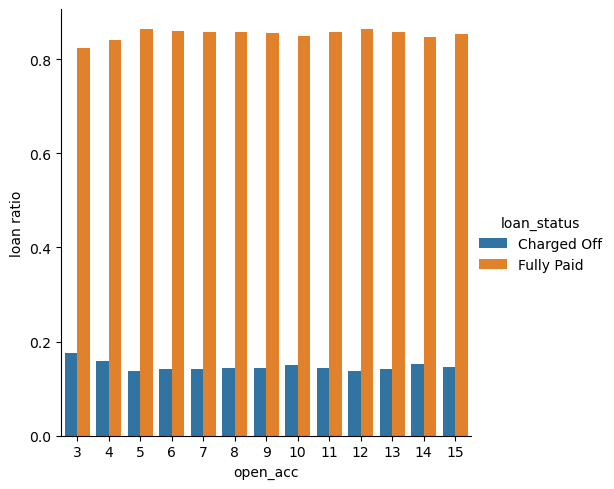

In [143]:
sns.catplot(data=df_open_acc,x='open_acc',y='loan ratio',hue='loan_status',kind='bar')

In [144]:
addr_st = df['addr_state'].value_counts() / df['addr_state'].value_counts().sum() 
addr_list = addr_st[addr_st >= .02].index

In [145]:
 df_state_loan = df[df['addr_state'].isin(addr_list)].groupby(['addr_state','loan_status']).agg(count = ('loan_status','count')).reset_index()

In [146]:
df_state_loan['total'] = df_state_loan.groupby(['addr_state'])['count'].transform('sum')

In [147]:
df_state_loan['loan ratio'] = df_state_loan['count'] / df_state_loan['total']

In [148]:
df_state_loan

,addr_state,loan_status,count,total,loan ratio
0,AZ,Charged Off,123,849,0.144876
1,AZ,Fully Paid,726,849,0.855124
2,CA,Charged Off,1125,6949,0.161894
3,CA,Fully Paid,5824,6949,0.838106
4,FL,Charged Off,504,2781,0.181230
5,FL,Fully Paid,2277,2781,0.818770
6,GA,Charged Off,215,1359,0.158205
7,GA,Fully Paid,1144,1359,0.841795
8,IL,Charged Off,197,1478,0.133288
9,IL,Fully Paid,1281,1478,0.866712


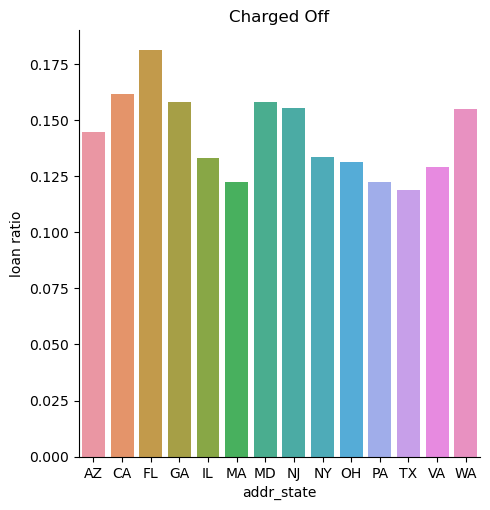

In [149]:
sns.catplot(data=df_state_loan[df_state_loan['loan_status'] == 'Charged Off' ],x='addr_state',y='loan ratio',kind='bar')
plt.title('Charged Off')
plt.show()

* People who live as tenants and people with motorgage house loans tend to make more loans

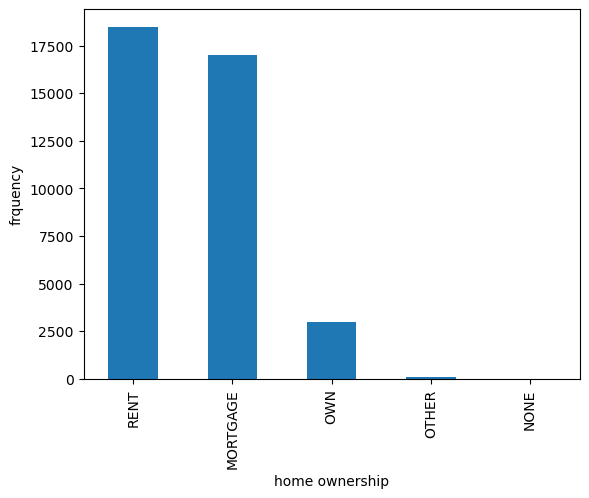

In [150]:
df['home_ownership'].value_counts().plot(kind='bar')
plt.xlabel('home ownership')
plt.ylabel('frquency')
plt.show()

In [151]:
df_home_owned  = df[df.home_ownership !='NONE'].groupby(['home_ownership','loan_status']).agg(count = ('loan_status','count')).reset_index()

In [152]:
df_home_owned['total'] = df_home_owned.groupby(['home_ownership'])['count'].transform('sum')

In [153]:
df_home_owned['loan ratio'] = df_home_owned['count'] / df_home_owned['total']

In [154]:
df_home_owned

,home_ownership,loan_status,count,total,loan ratio
0,MORTGAGE,Charged Off,2327,17021,0.136713
1,MORTGAGE,Fully Paid,14694,17021,0.863287
2,OTHER,Charged Off,18,98,0.183673
3,OTHER,Fully Paid,80,98,0.816327
4,OWN,Charged Off,443,2975,0.148908
5,OWN,Fully Paid,2532,2975,0.851092
6,RENT,Charged Off,2839,18480,0.153626
7,RENT,Fully Paid,15641,18480,0.846374


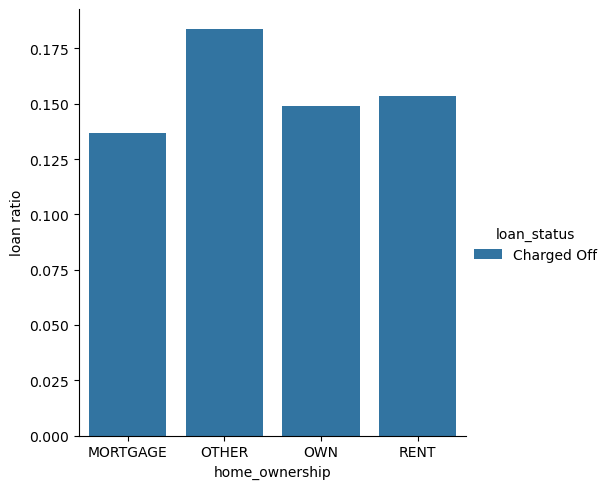

In [155]:
sns.catplot(data=df_home_owned[df_home_owned['loan_status'] == 'Charged Off'],x='home_ownership',y='loan ratio',hue='loan_status',kind='bar')

* Grade A through G represent the loan risk in the ascending order . Meaning the closer to A the lower the risk ,while the further from A higher the risk 
* It can be inferred from the plot that the low risk grades consider lower rates of interests 
* Grade A only has low interest rates , this is also matches with the insight that increase in interest rate can increase the chance of getting charged off
* In the low risk grades there are only low and avg interest rates , in c all 3 categories are present . In the above-avg risk zones there are avg and high interest rates , while in the high risk zone there are only high interest rates
* Moving from A through G , i.e low risk to high risk interest rate increases


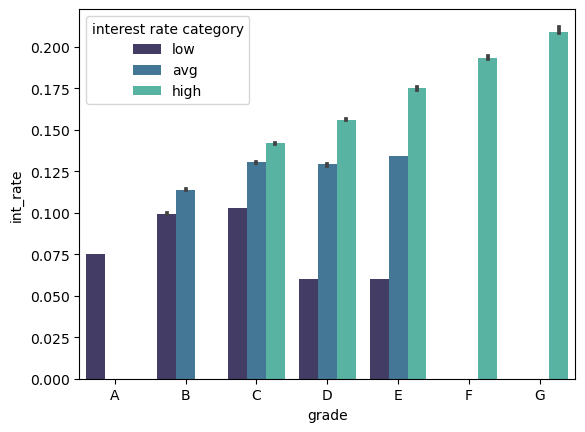

In [156]:
df_grade = df.copy()
df_grade['grade']  = df_grade['grade'].astype('category').cat.set_categories(["A","B","C","D","E","F","G"], ordered=True)
sns.barplot(data=df_grade,x='grade',y='int_rate',hue='interest_rate_cat',estimator=np.median,palette='mako')
plt.legend(loc='upper left',title='interest rate category')
plt.show()

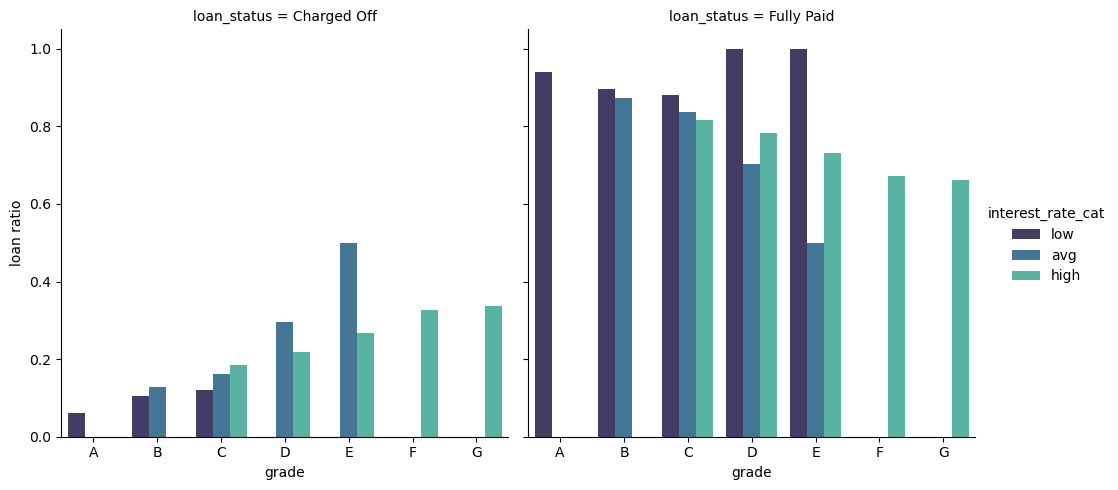

In [157]:

sns.catplot(data=col_split_plots(['grade','interest_rate_cat'],['loan_status']),x='grade',y='loan ratio',hue='interest_rate_cat',col='loan_status',kind='bar',palette='mako')

* Relationship between grade and monthly income
* mean income increases as you move from low risk grade to high risk grade

<Axes: xlabel='grade', ylabel='monthly_income'>

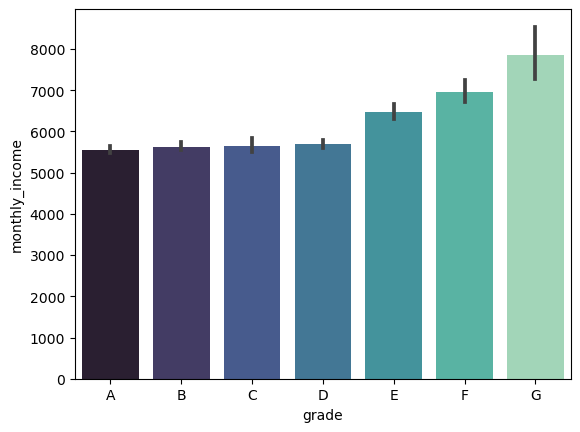

In [158]:

sns.barplot(data=df_grade,x='grade',y='monthly_income',estimator=np.mean,palette='mako')

<Axes: xlabel='grade', ylabel='annual_inc'>

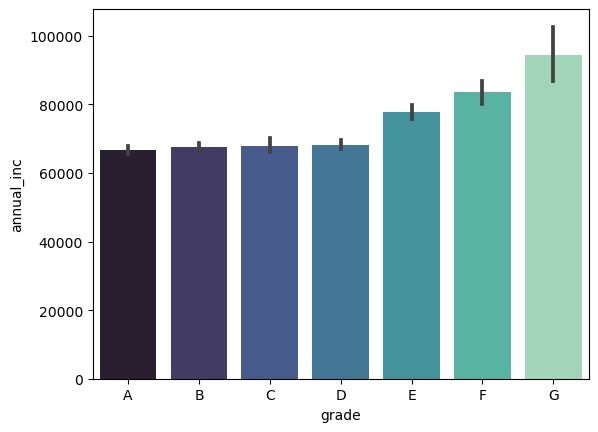

In [159]:
sns.barplot(data=df_grade,x='grade',y='annual_inc',estimator=np.mean,palette='mako')

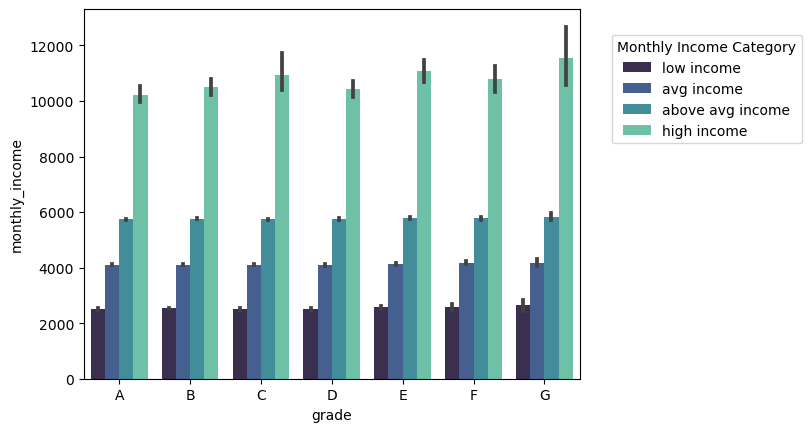

In [160]:

gmap = sns.barplot(data=df_grade,x='grade',y='monthly_income',hue='monthly_income_cat',estimator=np.mean,palette='mako')
sns.move_legend(gmap, "upper left", bbox_to_anchor=(1.05, .95), title='Monthly Income Category')
plt.show()

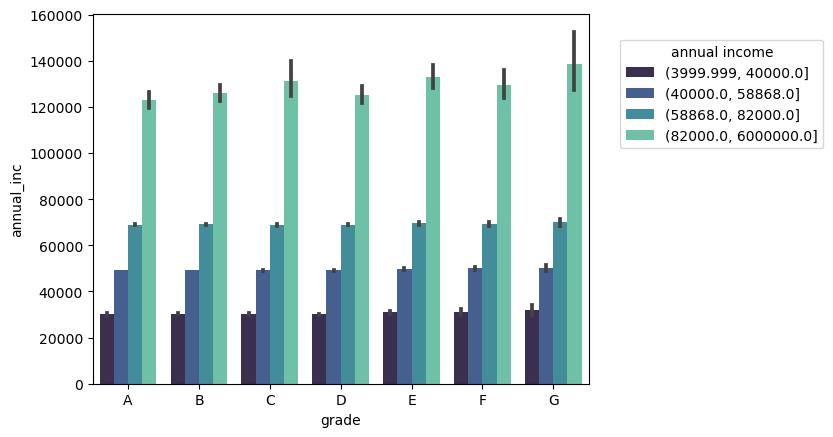

In [161]:
gmap = sns.barplot(data=df_grade,x='grade',y='annual_inc',hue='annual_income_cat',estimator=np.mean,palette='mako')
sns.move_legend(gmap, "upper left", bbox_to_anchor=(1.05, .95), title='annual income')
plt.show()

* Although the 2nd bankruptcies parameter shows arbitary behavior , it can be observed that people who had gone bankrupt once have a higher chance of of defaulting loans

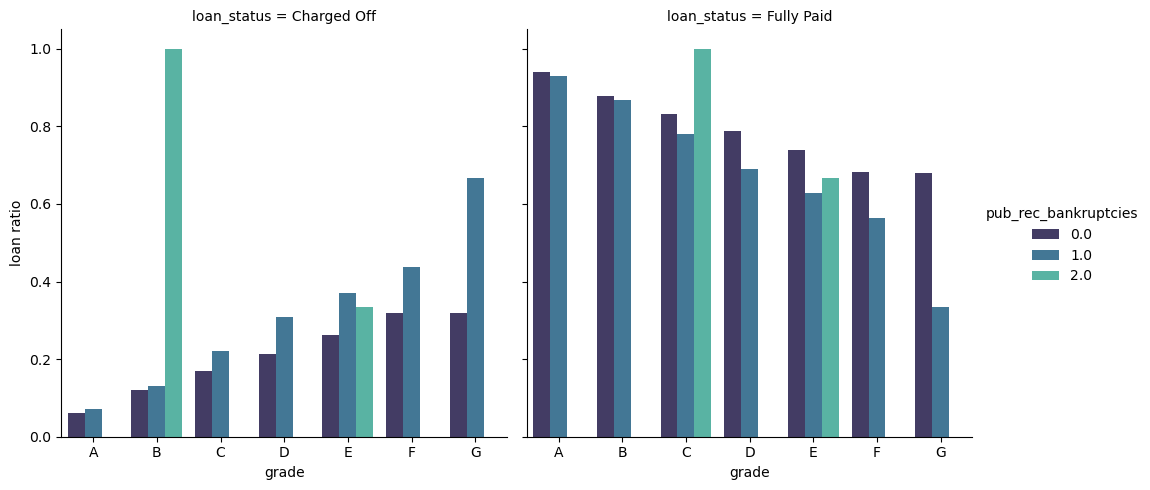

In [162]:
sns.catplot(data=col_split_plots(['grade','pub_rec_bankruptcies'],['loan_status']),x='grade',y='loan ratio',hue='pub_rec_bankruptcies',col='loan_status',kind='bar',palette='mako')

In [163]:
df_grade.groupby(['grade'])['annual_inc'].agg(['mean','median'])

,mean,median
grade,,
A,66681.565741,57700.0
B,67561.088141,57600.0
C,67731.499824,55281.0
D,68283.875176,59000.0
E,77791.061491,65000.0
F,83482.034457,72000.0
G,94273.316087,80000.0


In [164]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'term_duration_months', 'last_deliquency',
       'annual_income_cat', 'monthly_installment_cat', 'monthly_income',
       'monthly_income_cat', 'years_exp', 'monthly_int_rate',
       'interest_rate_cat', 'monthly_interest_rate_cat'],
      dtype='object')

# Outlier Removal

<Axes: >

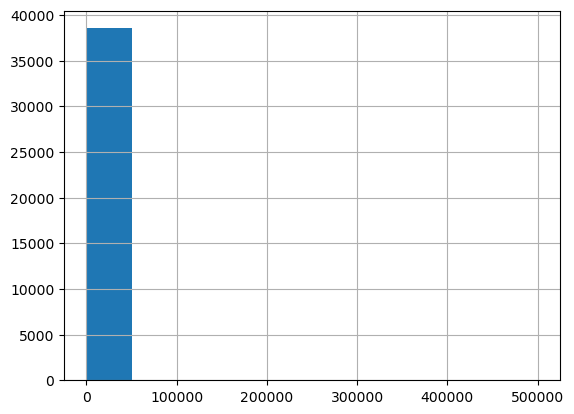

In [165]:
df['monthly_income'].hist()

<Axes: xlabel='monthly_income'>

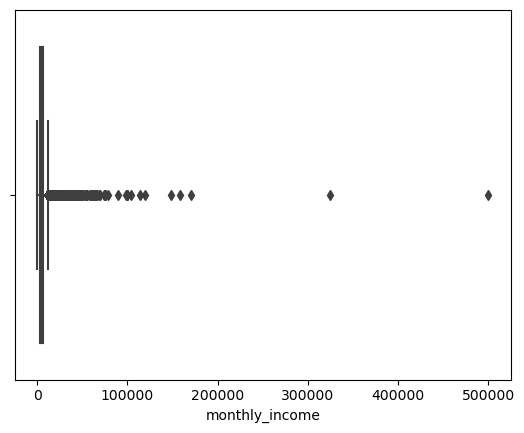

In [166]:
sns.boxplot(data=df,x='monthly_income')

In [167]:
# IQR outlier dectection
q1 = df['monthly_income'].quantile(.25)
q3 = df['monthly_income'].quantile(.75)
iqr = q3 - q1 
minv = q1 - 1.5 * iqr
maxv = q3 + 1.5 * iqr
df_out_rm = df[df['monthly_income'].between(minv,maxv)]

<Axes: >

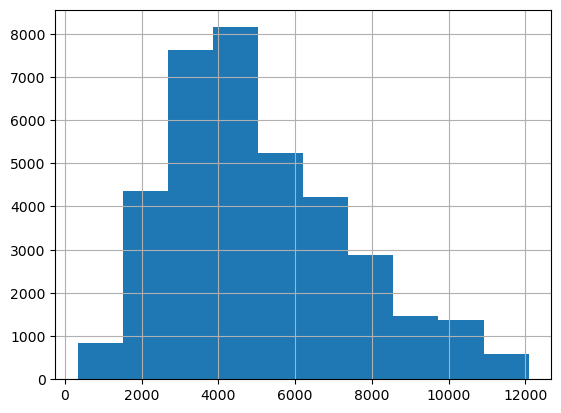

In [168]:
df_out_rm['monthly_income'].hist()

<Axes: xlabel='monthly_income'>

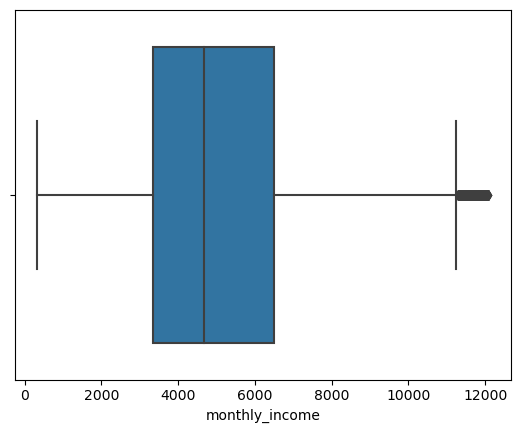

In [169]:
sns.boxplot(data=df_out_rm,x='monthly_income')

* Although not linear there is a certain trend taht the higher your income higher your installment rate would be 
* This is not to say borrowers with higher income don't take loans with lower interest rates. As seen borrowers with high income also tend to take low installment loans

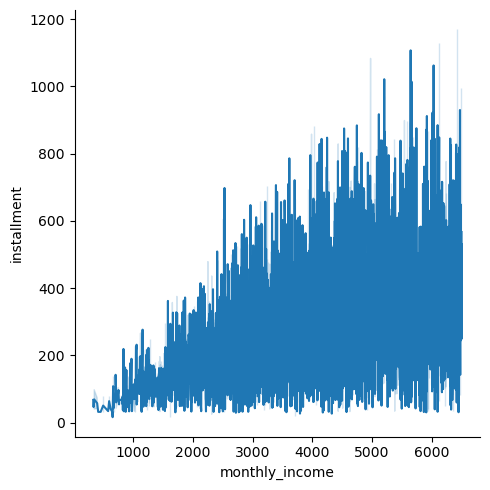

In [170]:

sns.relplot(data=df_out_rm[df_out_rm['monthly_income'].quantile(.75)> df_out_rm['monthly_income']],x='monthly_income',y='installment',kind='line')

In [171]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'term_duration_months', 'last_deliquency',
       'annual_income_cat', 'monthly_installment_cat', 'monthly_income',
       'monthly_income_cat', 'years_exp', 'monthly_int_rate',
       'interest_rate_cat', 'monthly_interest_rate_cat'],
      dtype='object')

* Higher the monthly income higher the installment , but this doesn't stop high income borrowers to opt for lower installments , while lower income borrowers donot opt for high installments

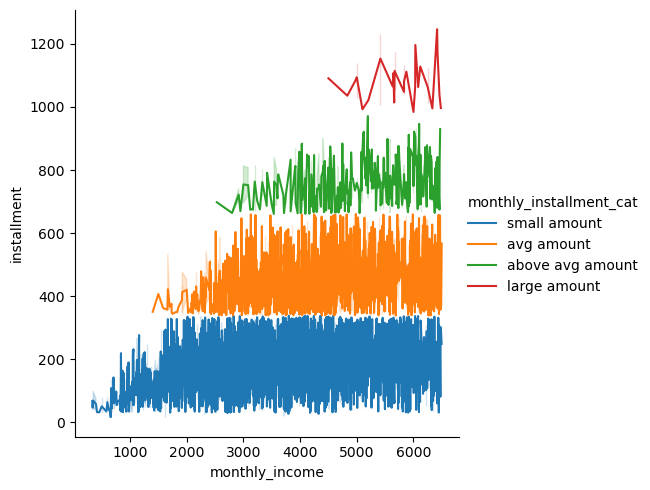

In [172]:

sns.relplot(data=df_out_rm[df_out_rm['monthly_income'].quantile(.75)> df_out_rm['monthly_income']],x='monthly_income',y='installment',kind='line',hue='monthly_installment_cat')

In [173]:
df['issue_month'] = df['issue_d'].apply(lambda x : x.split('-')[0])

In [174]:
df['issue_year'] = df['issue_d'].apply(lambda x : x.split('-')[1])

In [175]:
df['issue_year'] = df['issue_year'].astype('category').cat.set_categories(['07','08','09','10','11'],ordered=True)

<Axes: xlabel='issue_year', ylabel='count'>

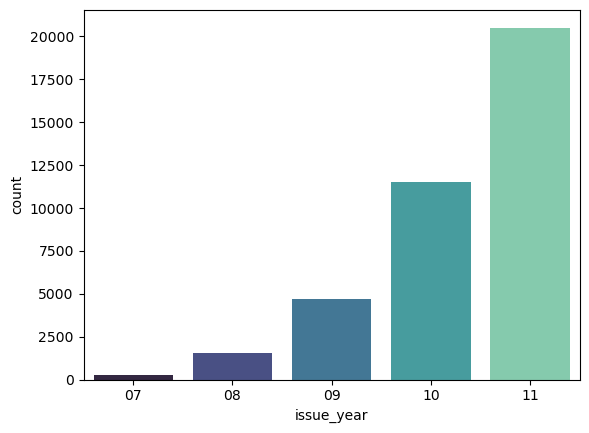

In [176]:
# Each year there is an increase in the no.of loans taken
sns.countplot(data=df,x='issue_year',palette='mako')

In [177]:
df['issue_month'] = df['issue_month'].apply(lambda x : datetime.strptime(x,'%b').month)

<Axes: xlabel='issue_month', ylabel='count'>

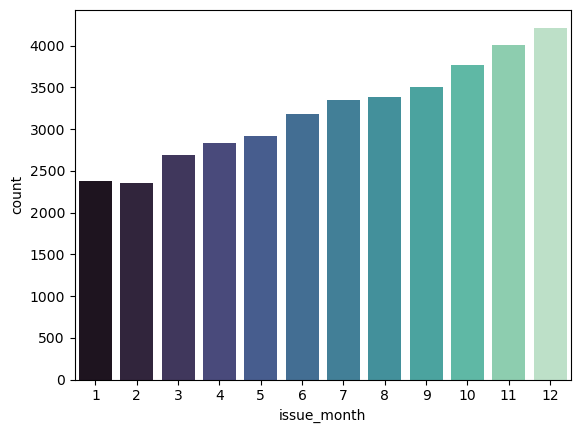

In [178]:
sns.countplot(data=df,x='issue_month',palette='mako')

<Axes: xlabel='issue_year', ylabel='count'>

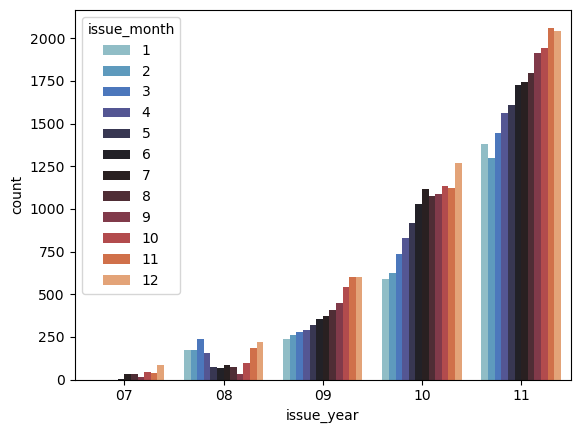

In [179]:
# Month December seems to be showing consistent performance across all months
sns.countplot(data=df,x='issue_year',hue='issue_month',palette='icefire')

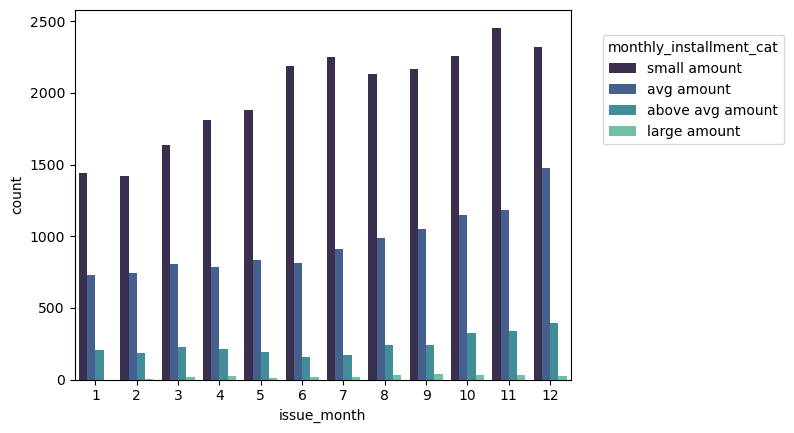

In [180]:
# Irrespective of the time of the year smaller installments are preffered over higher variants

gmap = sns.countplot(data=df,x='issue_month',palette='mako',hue='monthly_installment_cat')
sns.move_legend(gmap, "upper left", bbox_to_anchor=(1.05, .95), title='monthly_installment_cat')
plt.show()

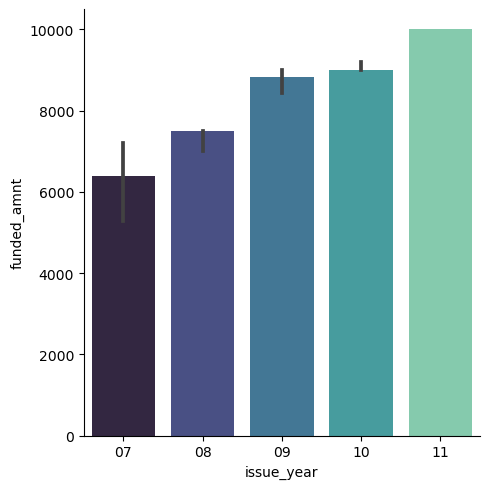

In [181]:
# Over the years the amount of loan given has increased
gmap = sns.catplot(data=df,x='issue_year',y='funded_amnt',palette='mako',kind='bar',estimator='median')
# sns.move_legend(gmap, "upper left", bbox_to_anchor=(1.05, .95), title='annual income')
# plt.show()

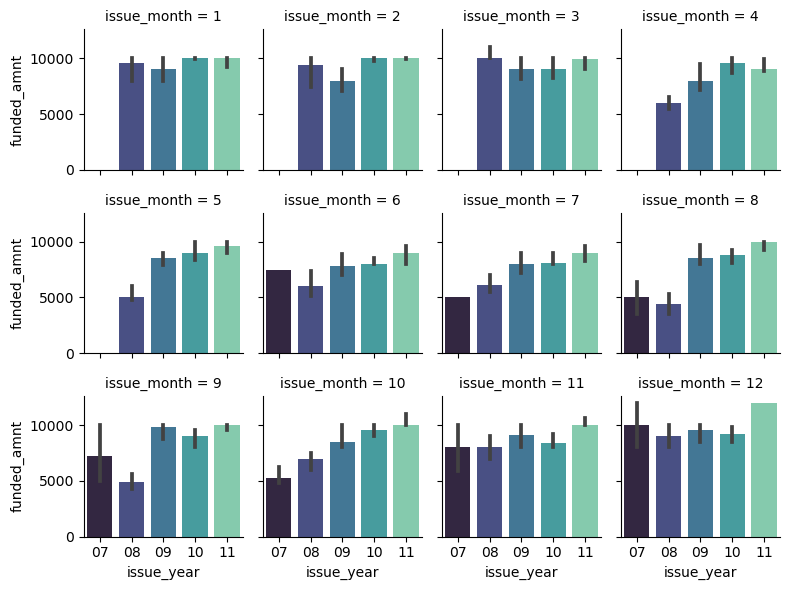

In [182]:
sns.catplot(data=df,x='issue_year',y='funded_amnt',palette='mako',kind='bar',col_wrap=4,col='issue_month',estimator='median',height=2)

In [183]:
df['chargedoff'] = df['loan_status'].apply(lambda x : 1 if x=='Charged Off' else 0 )

In [184]:
df_charegoff_year =df.groupby(['issue_year']).agg(chargeoff_rate=('chargedoff','mean')).reset_index()

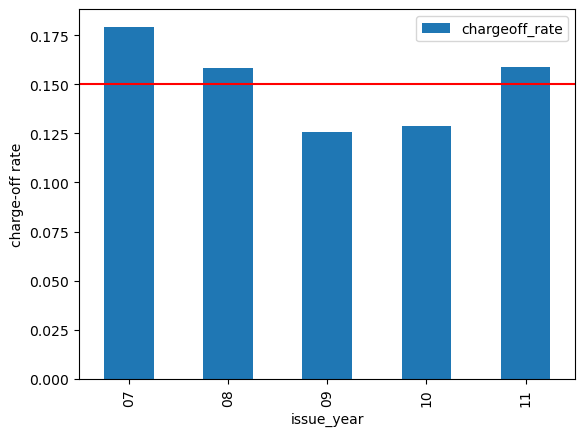

In [185]:
df_charegoff_year.set_index('issue_year').plot(kind='bar')
plt.axhline(np.mean(df_charegoff_year['chargeoff_rate']),color='red')
plt.ylabel('charge-off rate')
plt.show()

In [186]:
df.addr_state.value_counts()

CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
IL    1478
PA    1468
VA    1369
GA    1359
MA    1297
OH    1178
MD    1023
AZ     849
WA     818
CO     766
NC     750
CT     726
MI     704
MO     670
MN     605
NV     479
SC     459
WI     440
AL     435
OR     435
LA     427
KY     311
OK     287
KS     255
UT     252
AR     235
DC     211
RI     194
NM     183
WV     172
NH     166
HI     166
DE     113
MT      83
WY      80
AK      78
SD      62
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

In [187]:
states = df.addr_state.value_counts()[df.addr_state.value_counts() > 9].index

In [188]:
df_chargeoff_addr = df[df.addr_state.isin(states)].groupby(['addr_state']).agg(chargedoff_rate= ('chargedoff','mean'))

* NV,SD,AK,FL are the states with the most chargedoff rate 
* NV has a charged off rate close to 21%

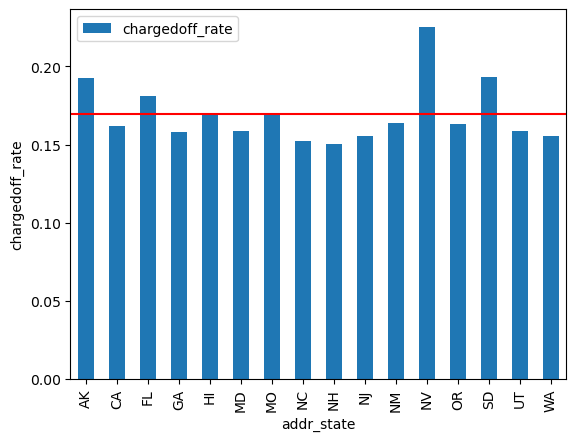

In [189]:
df_chargeoff_addr[df_chargeoff_addr['chargedoff_rate'] > .15].plot(kind='bar')
plt.axhline(np.mean(df_chargeoff_addr[df_chargeoff_addr['chargedoff_rate'] > .15]['chargedoff_rate']),color='red')
plt.ylabel('chargedoff_rate')
plt.show()

* States WY,DC have the highest fully paid rate

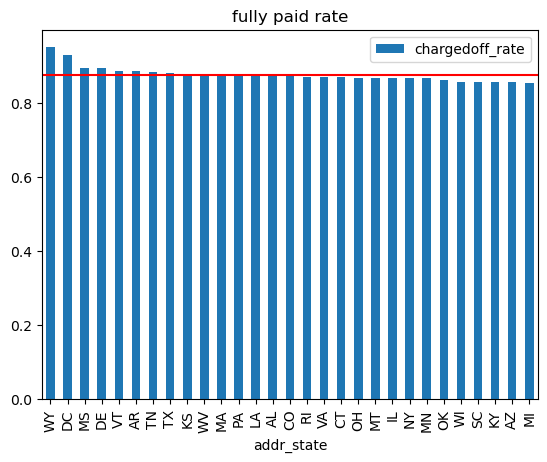

In [190]:
(1 - df_chargeoff_addr)[(1 - df_chargeoff_addr)['chargedoff_rate'] > .85 ].sort_values(['chargedoff_rate'],ascending=False).plot(kind='bar')
plt.axhline(np.mean((1 - df_chargeoff_addr)[(1 - df_chargeoff_addr)['chargedoff_rate'] > .85 ]['chargedoff_rate']),color='red')
plt.title('fully paid rate')
plt.show()

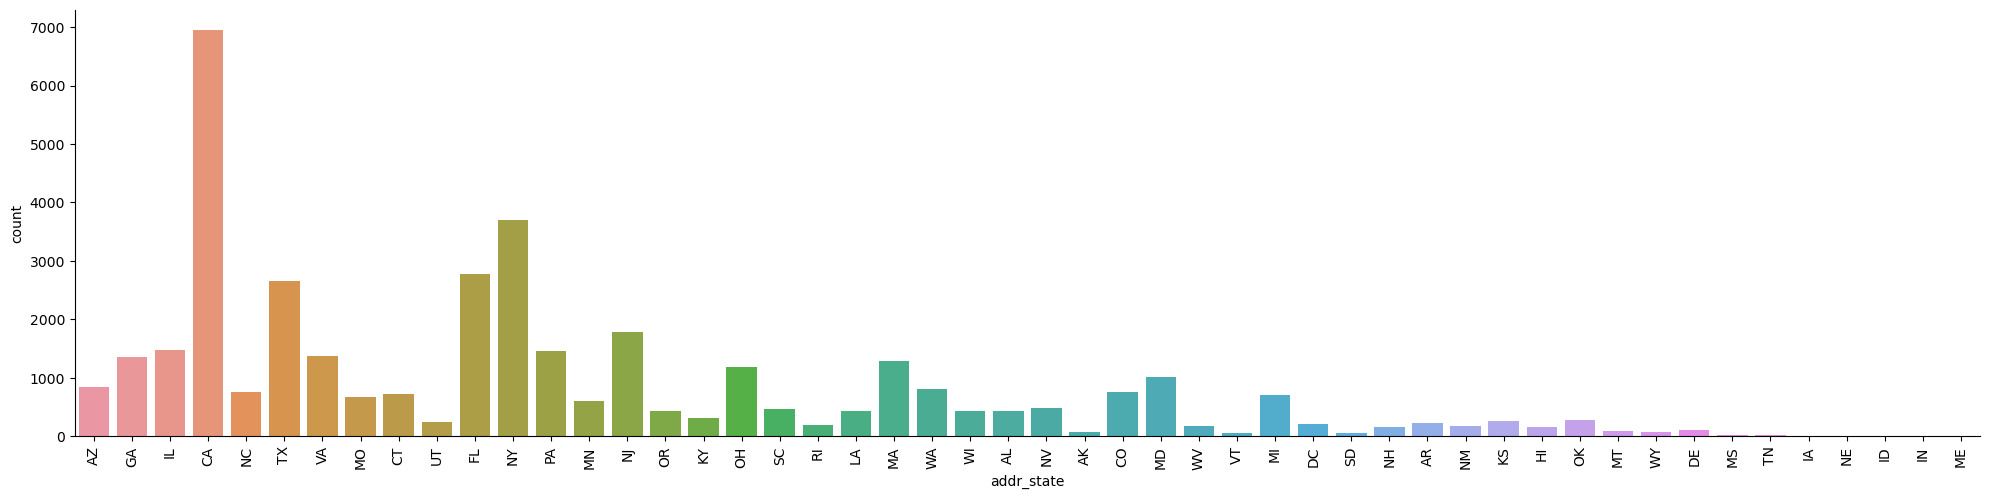

In [191]:
# CA is the state where the highest noof loans are taken
sns.catplot(data=df,x='addr_state',kind='count',aspect=4)
plt.xticks(rotation=90)
plt.show()

In [192]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'term_duration_months', 'last_deliquency',
       'annual_income_cat', 'monthly_installment_cat', 'monthly_income',
       'monthly_income_cat', 'years_exp', 'monthly_int_rate',
       'interest_rate_cat', 'monthly_interest_rate_cat', 'issue_month',
       'issue_year', 'chargedoff'],
      dtype='object')

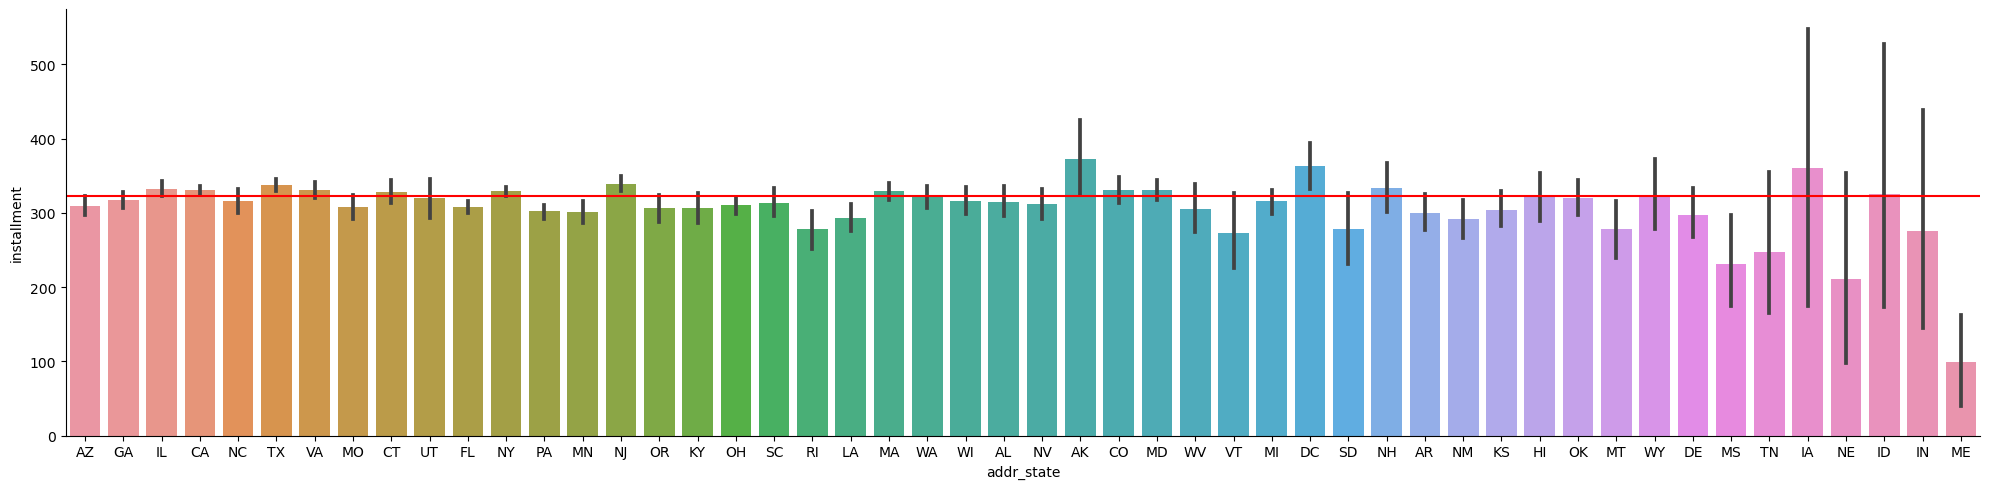

In [193]:
sns.catplot(data=df,x='addr_state',y='installment',estimator='mean',kind='bar',aspect=4)
plt.axhline(np.mean(df['installment']),color='red')

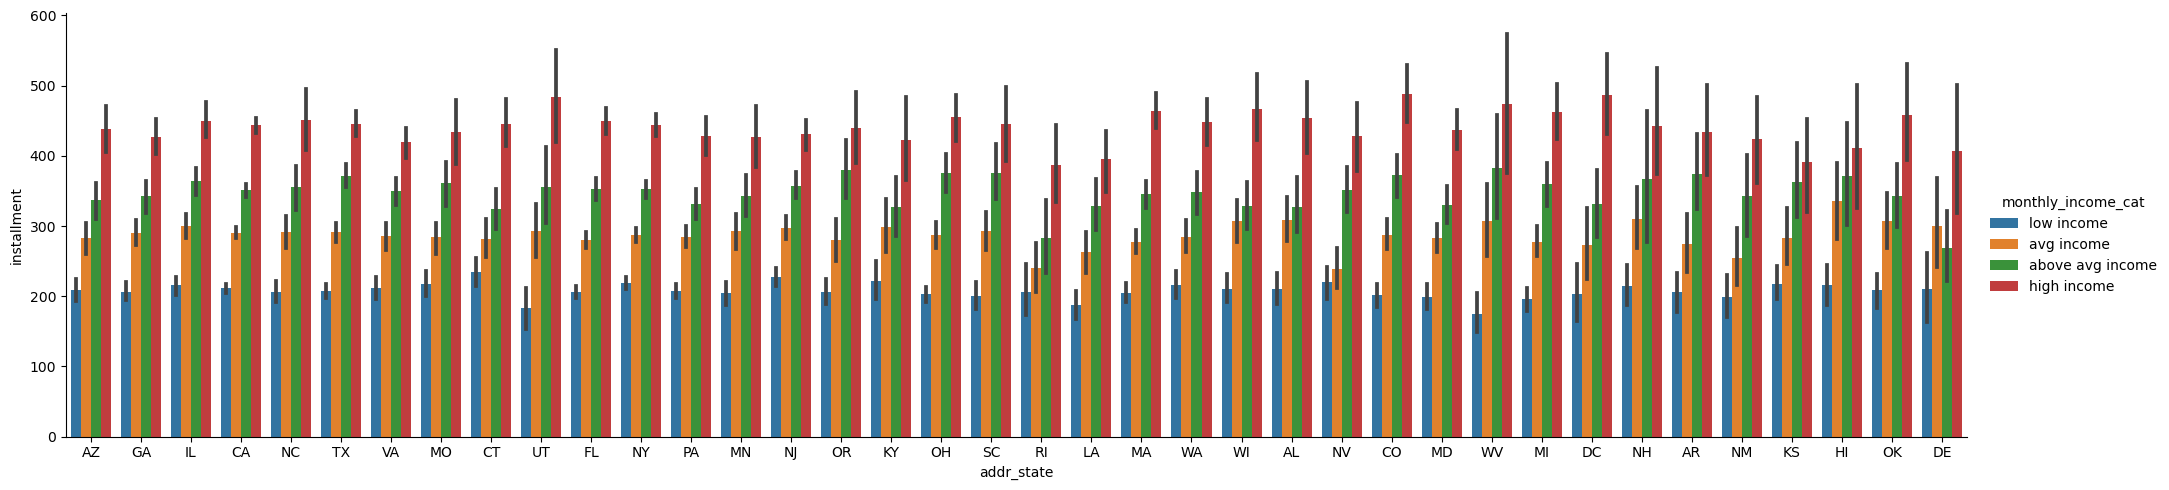

In [194]:
states = df.addr_state.value_counts()[df.addr_state.value_counts() > 100].index
sns.catplot(data=df[df.addr_state.isin(states)],x='addr_state',y='installment',hue='monthly_income_cat',estimator='mean',kind='bar',aspect=4)

In [195]:
df['inq_last_6mths'].value_counts()

0    18709
1    10660
2     5654
3     2983
4      316
5      144
6       63
7       34
8       14
Name: inq_last_6mths, dtype: int64

* 6,7 and 8 have a very high default rate , given there are very few people in the category

<Axes: xlabel='inq_last_6mths'>

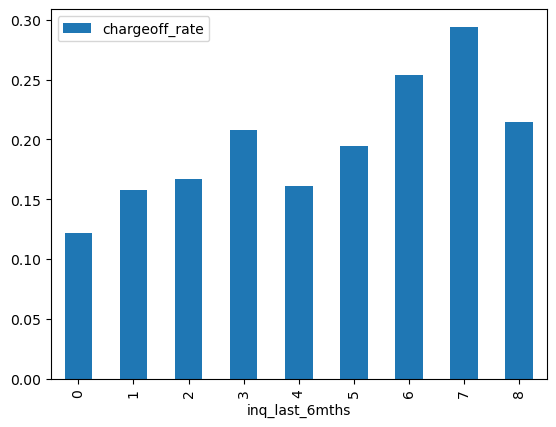

In [196]:

df.groupby('inq_last_6mths').agg(chargeoff_rate=('chargedoff','mean')).plot(kind='bar')

In [197]:
df['delinq_2yrs'].value_counts() 

0     34386
1      3207
2       673
3       212
4        60
5        21
6        10
7         4
8         2
9         1
11        1
Name: delinq_2yrs, dtype: int64

In [198]:
delinq = df['delinq_2yrs'].value_counts()[df['delinq_2yrs'].value_counts() >=60 ].index

<Axes: xlabel='delinq_2yrs'>

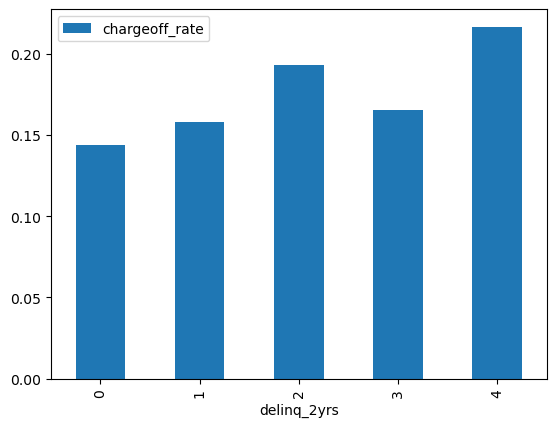

In [199]:

df[df['delinq_2yrs'].isin(delinq)].groupby('delinq_2yrs').agg(chargeoff_rate=('chargedoff','mean')).plot(kind='bar')

* DTI stands for Debt to Income ratio 
* As the DTI ratio increases (i.e is your debt increases compared to your income ) default rate increases

In [200]:
df['dti'].describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

<Axes: ylabel='Frequency'>

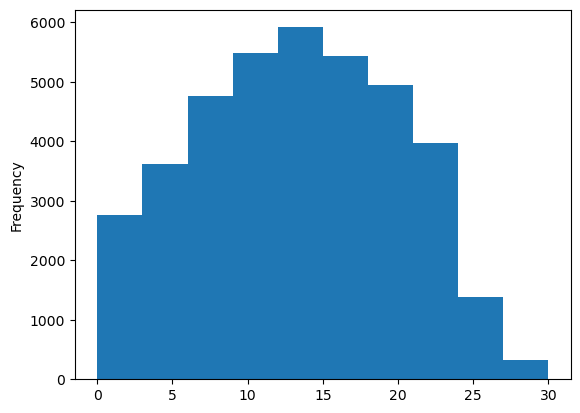

In [201]:
df['dti'].plot(kind='hist')

In [202]:
df[df['dti'] == 0]

,loan_amnt,funded_amnt,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,term_duration_months,last_deliquency,annual_income_cat,monthly_installment_cat,monthly_income,monthly_income_cat,years_exp,monthly_int_rate,interest_rate_cat,monthly_interest_rate_cat,issue_month,issue_year,chargedoff
2629,25000,25000,0.0790,782.26,A,A4,NaN,10+ years,MORTGAGE,200000.0,Source Verified,Nov-11,Fully Paid,home_improvement,MA,0.0,0,3,NaN,NaN,6,0,0,0%,14,25634.619510,25000.00,634.62,0.0,0.00,Apr-12,23291.01,Feb-13,0.0,36,NaN,"(82000.0, 6000000.0]",above avg amount,16666.666667,high income,atleast 10 years,0.006583,low,low,11,11,0
2938,15000,15000,0.0751,466.67,A,A3,bnsf railway,9 years,MORTGAGE,65004.0,Not Verified,Nov-11,Fully Paid,other,MO,0.0,0,0,NaN,NaN,4,0,0,0%,14,16214.565510,15000.00,1214.57,0.0,0.00,Apr-13,9227.42,Apr-13,0.0,36,NaN,"(58868.0, 82000.0]",avg amount,5417.000000,above avg income,6-9 years,0.006258,low,low,11,11,0
3208,3500,3500,0.1629,123.56,D,D1,WiFiFee LLC.,3 years,MORTGAGE,50000.0,Not Verified,Nov-11,Charged Off,major_purchase,NY,0.0,1,0,10.0,NaN,3,0,0,0%,16,4019.000000,3019.28,930.32,0.0,69.40,Aug-14,123.56,Jan-15,0.0,36,"(-0.001, 13.0]","(40000.0, 58868.0]",small amount,4166.666667,avg income,2-5 years,0.013575,high,high,11,11,1
4086,6500,6500,0.1065,211.73,B,B2,Donovan Hatem LLP,2 years,MORTGAGE,56650.0,Not Verified,Nov-11,Fully Paid,debt_consolidation,MA,0.0,0,2,NaN,NaN,2,0,0,0%,7,7267.224670,6500.00,767.22,0.0,0.00,Apr-13,1687.68,Oct-14,0.0,36,NaN,"(40000.0, 58868.0]",small amount,4720.833333,avg income,2-5 years,0.008875,avg,avg,11,11,0
4545,5150,5150,0.0790,161.15,A,A4,Walmart Information Systems Division,7 years,RENT,68000.0,Verified,Nov-11,Fully Paid,debt_consolidation,AR,0.0,0,2,78.0,NaN,6,0,0,0%,10,5801.189857,5150.00,651.19,0.0,0.00,Nov-14,165.12,Apr-16,0.0,36,"(61.0, 120.0]","(58868.0, 82000.0]",small amount,5666.666667,above avg income,6-9 years,0.006583,low,low,11,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39567,3000,3000,0.0712,92.80,A,A1,"Park Place Everett, LLC",5 years,MORTGAGE,93000.0,Not Verified,Nov-07,Fully Paid,home_improvement,WA,0.0,0,0,0.0,0.0,7,0,368,1.20%,15,3339.035809,3000.00,339.04,0.0,0.00,Oct-10,11.71,Oct-10,NaN,36,"(-0.001, 13.0]","(82000.0, 6000000.0]",small amount,7750.000000,high income,2-5 years,0.005933,low,low,11,07,0
39613,5000,5000,0.1217,166.48,D,D2,NaN,< 1 year,RENT,10000.0,Not Verified,Oct-07,Charged Off,small_business,MD,0.0,1,2,15.0,0.0,5,0,875,54.70%,8,2477.030000,1756.71,574.25,0.0,146.07,Jul-09,333.29,Mar-15,NaN,36,"(13.0, 23.0]","(3999.999, 40000.0]",small amount,833.333333,low income,upto 1 year,0.010142,avg,avg,10,07,1
39632,3775,3775,0.0743,117.31,A,A2,SRA Benefits,7 years,MORTGAGE,120000.0,Not Verified,Oct-07,Fully Paid,other,MO,0.0,0,1,64.0,0.0,10,0,0,0%,22,4191.717919,3775.00,416.72,0.0,0.00,Aug-10,9.70,Mar-16,NaN,36,"(61.0, 120.0]","(82000.0, 6000000.0]",small amount,10000.000000,high income,6-9 years,0.006192,low,low,10,07,0
39694,5000,5000,0.0743,155.38,A,A2,Oracle Corporation,8 years,MORTGAGE,150000.0,Not Verified,Jul-07,Fully Paid,home_improvement,GA,0.0,0,0,0.0,0.0,2,0,6053,19.50%,19,5174.186842,5000.00,174.19,0.0,0.00,Jan-08,4397.47,Jun-07,NaN,36,"(-0.001, 13.0]","(82000.0, 6000000.0]",small amount,12500.000000,high income,6-9 years,0.006192,low,low,7,07,0


In [203]:
df['dti'].value_counts(bins=3,sort=False)

(-0.031, 9.997]    12905
(9.997, 19.993]    18448
(19.993, 29.99]     7224
Name: dti, dtype: int64

In [204]:
df['dti_bins'] = pd.qcut(df['dti'],q=6)

In [205]:
df['dti_bins']

0          (20.5, 29.99]
1        (-0.001, 6.023]
2          (6.023, 9.96]
3          (16.71, 20.5]
5          (9.96, 13.37]
              ...       
39712      (9.96, 13.37]
39713      (6.023, 9.96]
39714    (-0.001, 6.023]
39715    (-0.001, 6.023]
39716     (13.37, 16.71]
Name: dti_bins, Length: 38577, dtype: category
Categories (6, interval[float64, right]): [(-0.001, 6.023] < (6.023, 9.96] < (9.96, 13.37] < (13.37, 16.71] < (16.71, 20.5] < (20.5, 29.99]]

In [206]:
df['dti_bins'].value_counts()

(6.023, 9.96]      6440
(13.37, 16.71]     6432
(-0.001, 6.023]    6430
(9.96, 13.37]      6430
(16.71, 20.5]      6424
(20.5, 29.99]      6421
Name: dti_bins, dtype: int64

In [207]:
df.groupby(['dti_bins','loan_status'])['loan_status'].count()

dti_bins         loan_status
(-0.001, 6.023]  Charged Off     783
                 Fully Paid     5647
(6.023, 9.96]    Charged Off     839
                 Fully Paid     5601
(9.96, 13.37]    Charged Off     904
                 Fully Paid     5526
(13.37, 16.71]   Charged Off     984
                 Fully Paid     5448
(16.71, 20.5]    Charged Off    1045
                 Fully Paid     5379
(20.5, 29.99]    Charged Off    1072
                 Fully Paid     5349
Name: loan_status, dtype: int64

* The red-line represents the mean of the charged off rate

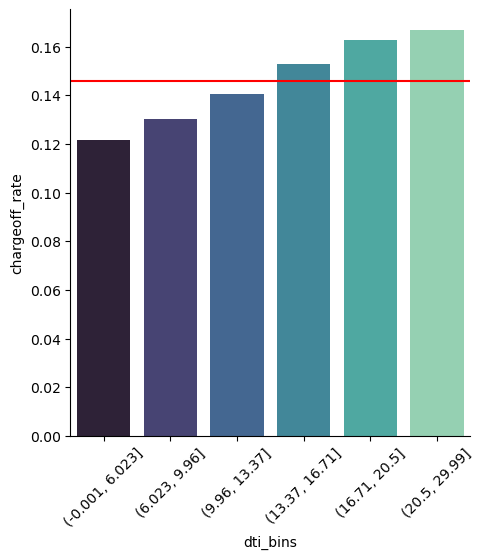

In [208]:

df_dti = df.groupby('dti_bins').agg(chargeoff_rate=('chargedoff','mean')).reset_index()
sns.catplot(data=df_dti,x='dti_bins',y='chargeoff_rate',kind='bar',palette='mako')
plt.axhline(np.mean(df_dti['chargeoff_rate']),color='red')
plt.xticks(rotation=45)
plt.show()

* There is this trend that as you move from low risk grade to high risk grade dti rate increases which makes sense 
* This also makes it clear as to why even though there was clearly higher income in the high risk grades , they had a high charge off rate , coupled with the fact that each and every grade has all the categories of income 

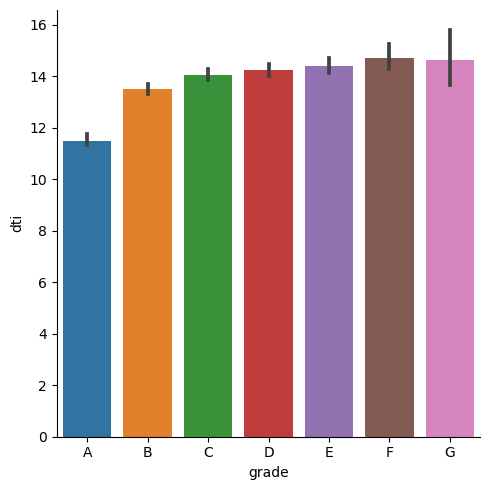

In [209]:
sns.catplot(data=df_grade,x='grade',y='dti',kind='bar',estimator=np.median)

In [210]:
df_grade['dti_bins'] = pd.qcut(df['dti'],q=6)

In [211]:
df_grade_dti =  df_grade.groupby(['grade','dti_bins']).agg(count = ('dti_bins','count')).reset_index()
df_grade_dti['total'] = df_grade_dti.groupby(['grade'])['count'].transform('sum')
df_grade_dti['dti_rate'] = df_grade_dti['count'] / df_grade_dti['total']

* Even though grade A has high dti rate , the dti ratio of A lies in a very small bin , while F and G have almost as high dti rates and come from much higher dti ratio bins 

In [212]:
df_grade_dti.sort_values(['dti_rate','dti_bins'],ascending=False)

,grade,dti_bins,count,total,dti_rate
0,A,"(-0.001, 6.023]",2302,10045,0.229169
34,F,"(16.71, 20.5]",217,976,0.222336
40,G,"(16.71, 20.5]",61,299,0.204013
41,G,"(20.5, 29.99]",58,299,0.193980
22,D,"(16.71, 20.5]",980,5085,0.192724
29,E,"(20.5, 29.99]",512,2663,0.192264
1,A,"(6.023, 9.96]",1926,10045,0.191737
27,E,"(13.37, 16.71]",499,2663,0.187383
37,G,"(6.023, 9.96]",56,299,0.187291
33,F,"(13.37, 16.71]",182,976,0.186475


* As seen the high risk grades have a higher dti rate as compared to the lower risk grades

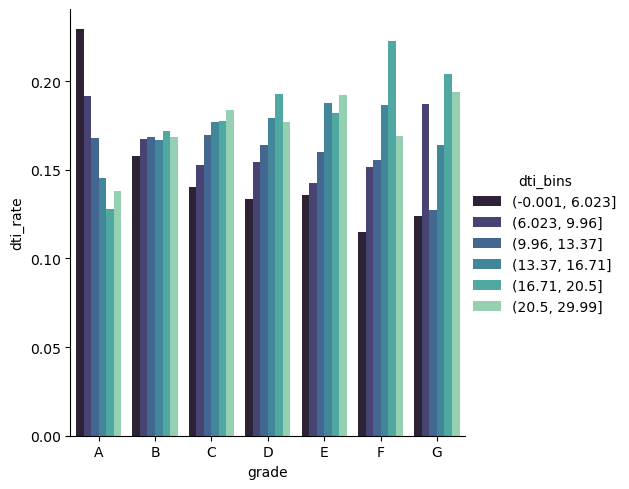

In [213]:
sns.catplot(data=df_grade_dti,x='grade',y='dti_rate',hue='dti_bins',kind='bar',palette='mako')

* Revolving Balance is the amount of debt the credit card holder owes to the credit card provider 
* the default rate increases as the revolving balance increases
* Although not as evident , the smaller revolving balance bins have a higher full payment rate
* This doesn't hold true for every bin , but there is a pattern
* This isn't a strong pattern , but a rather passive one 

In [214]:
pd.qcut(df['revol_bal'],q=8).value_counts(sort=False)

(-0.001, 1514.0]       4823
(1514.0, 3650.0]       4822
(3650.0, 6004.0]       4823
(6004.0, 8762.0]       4822
(8762.0, 12165.0]      4822
(12165.0, 16912.0]     4822
(16912.0, 25974.0]     4822
(25974.0, 149588.0]    4821
Name: revol_bal, dtype: int64

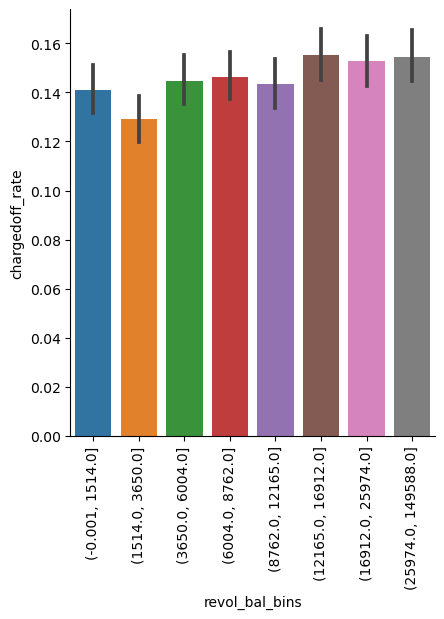

In [215]:
df['revol_bal_bins'] = pd.qcut(df['revol_bal'],q=8)
sns.catplot(data=df,x='revol_bal_bins',y='chargedoff',estimator='mean',kind='bar')
plt.ylabel('chargedoff_rate')
plt.xticks(rotation=90)
plt.show()

In [216]:
df['Full Payment'] = 1 - df['chargedoff']

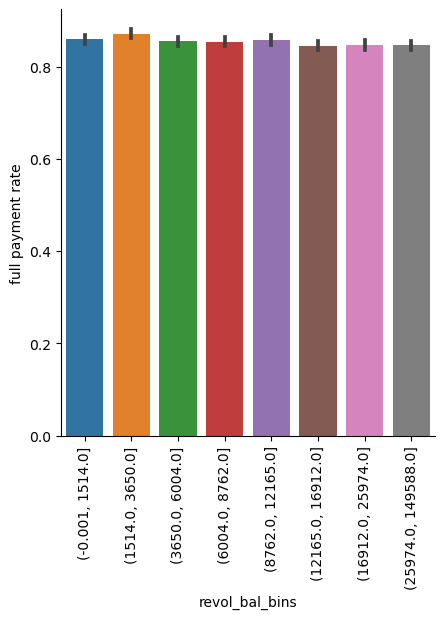

In [217]:
sns.catplot(data = df,x='revol_bal_bins',y='Full Payment',estimator='mean',kind='bar')
plt.ylabel('full payment rate')
plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, 'charge off rate')

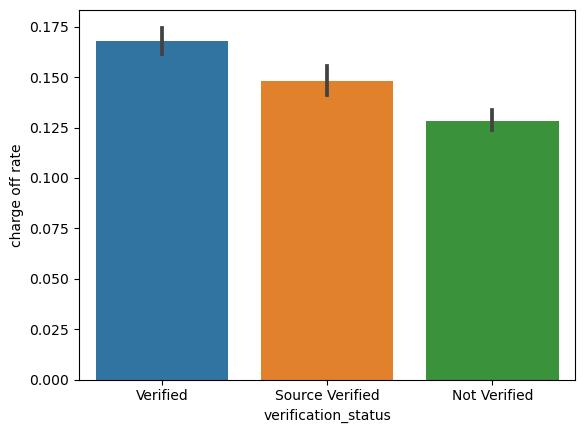

In [218]:
sns.barplot(data=df,x='verification_status',y='chargedoff',estimator=np.mean)
plt.ylabel('charge off rate')

Text(0, 0.5, 'charge off rate')

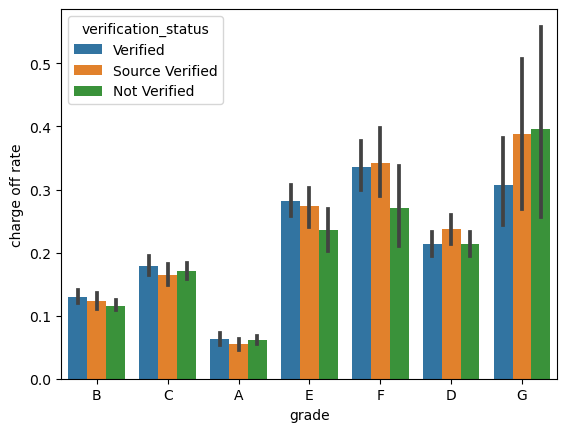

In [219]:

sns.barplot(data=df,x='grade',y='chargedoff',hue='verification_status',estimator=np.mean)
plt.ylabel('charge off rate')

In [220]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'term_duration_months', 'last_deliquency',
       'annual_income_cat', 'monthly_installment_cat', 'monthly_income',
       'monthly_income_cat', 'years_exp', 'monthly_int_rate',
       'interest_rate_cat', 'monthly_interest_rate_cat', 'issue_month',
       'issue_year', 'chargedoff', 'dti_bins', 'revol_bal_bins',
       'Full Payment'],
      dtype='object')